Attempt to look at MUA changes due to ANI admin from scratch - forgot to grab existing notebook using NeuroPy from GitHub repository before jumping on flight.

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py
import seaborn as sns
import sys

neuropy_path = Path('/Users/nkinsky/Documents/UM/GitHub/NeuroPy')
eraser_path = Path('/Users/nkinsky/Documents/BU/GitHub/Eraser/Ephys')
sys.path.append(str(neuropy_path))
sys.path.append(str(eraser_path))
%load_ext autoreload
%autoreload 2

from neuropy.utils.ccg import correlograms
from neuropy.utils.mathutil import contiguous_regions
from neuropy.io.openephysio import get_dat_timestamps
from ephys import *

In [2]:
working_dir = Path('/Users/nkinsky/Documents/UM/Working/Anisomycin/Recording_Rats/Wedge')

In [3]:
saline1_folder = '2022_12_12_saline'
ani_folder = '2022_12_13_anisomycin50mg'
saline2_folder = '2022_12_14_saline2'
ani2_folder = '2022_12_15_anisomycin25'
rec_only_folder = '2022_12_16_recordonly'
saline3_folder = '2022_12_21_saline3'


folder_list = [saline1_folder, ani_folder, saline2_folder, saline3_folder]
unit_type = ['single', 'single', 'single', 'single']
session = ['saline1', 'ANI', 'saline2', 'saline3']

In [69]:
sal1_timestamps = get_dat_timestamps(working_dir / saline1_folder)

start time = 2022-12-12 12:20:06
start time = 2022-12-12 12:40:17
start time = 2022-12-12 13:12:26
start time = 2022-12-12 13:16:46


In [71]:
corr_by_epoch_sal1, time_bins_sal1, epochs_used_sal1 = calc_ccg_by_epoch(saline1_folder, 
                                                                         timestamps=sal1_timestamps)

Calculating CCGs for epoch pre
Calculating CCGs for epoch injection
Calculating CCGs for epoch track (novel)
Calculating CCGs for epoch post


<IPython.core.display.Javascript object>


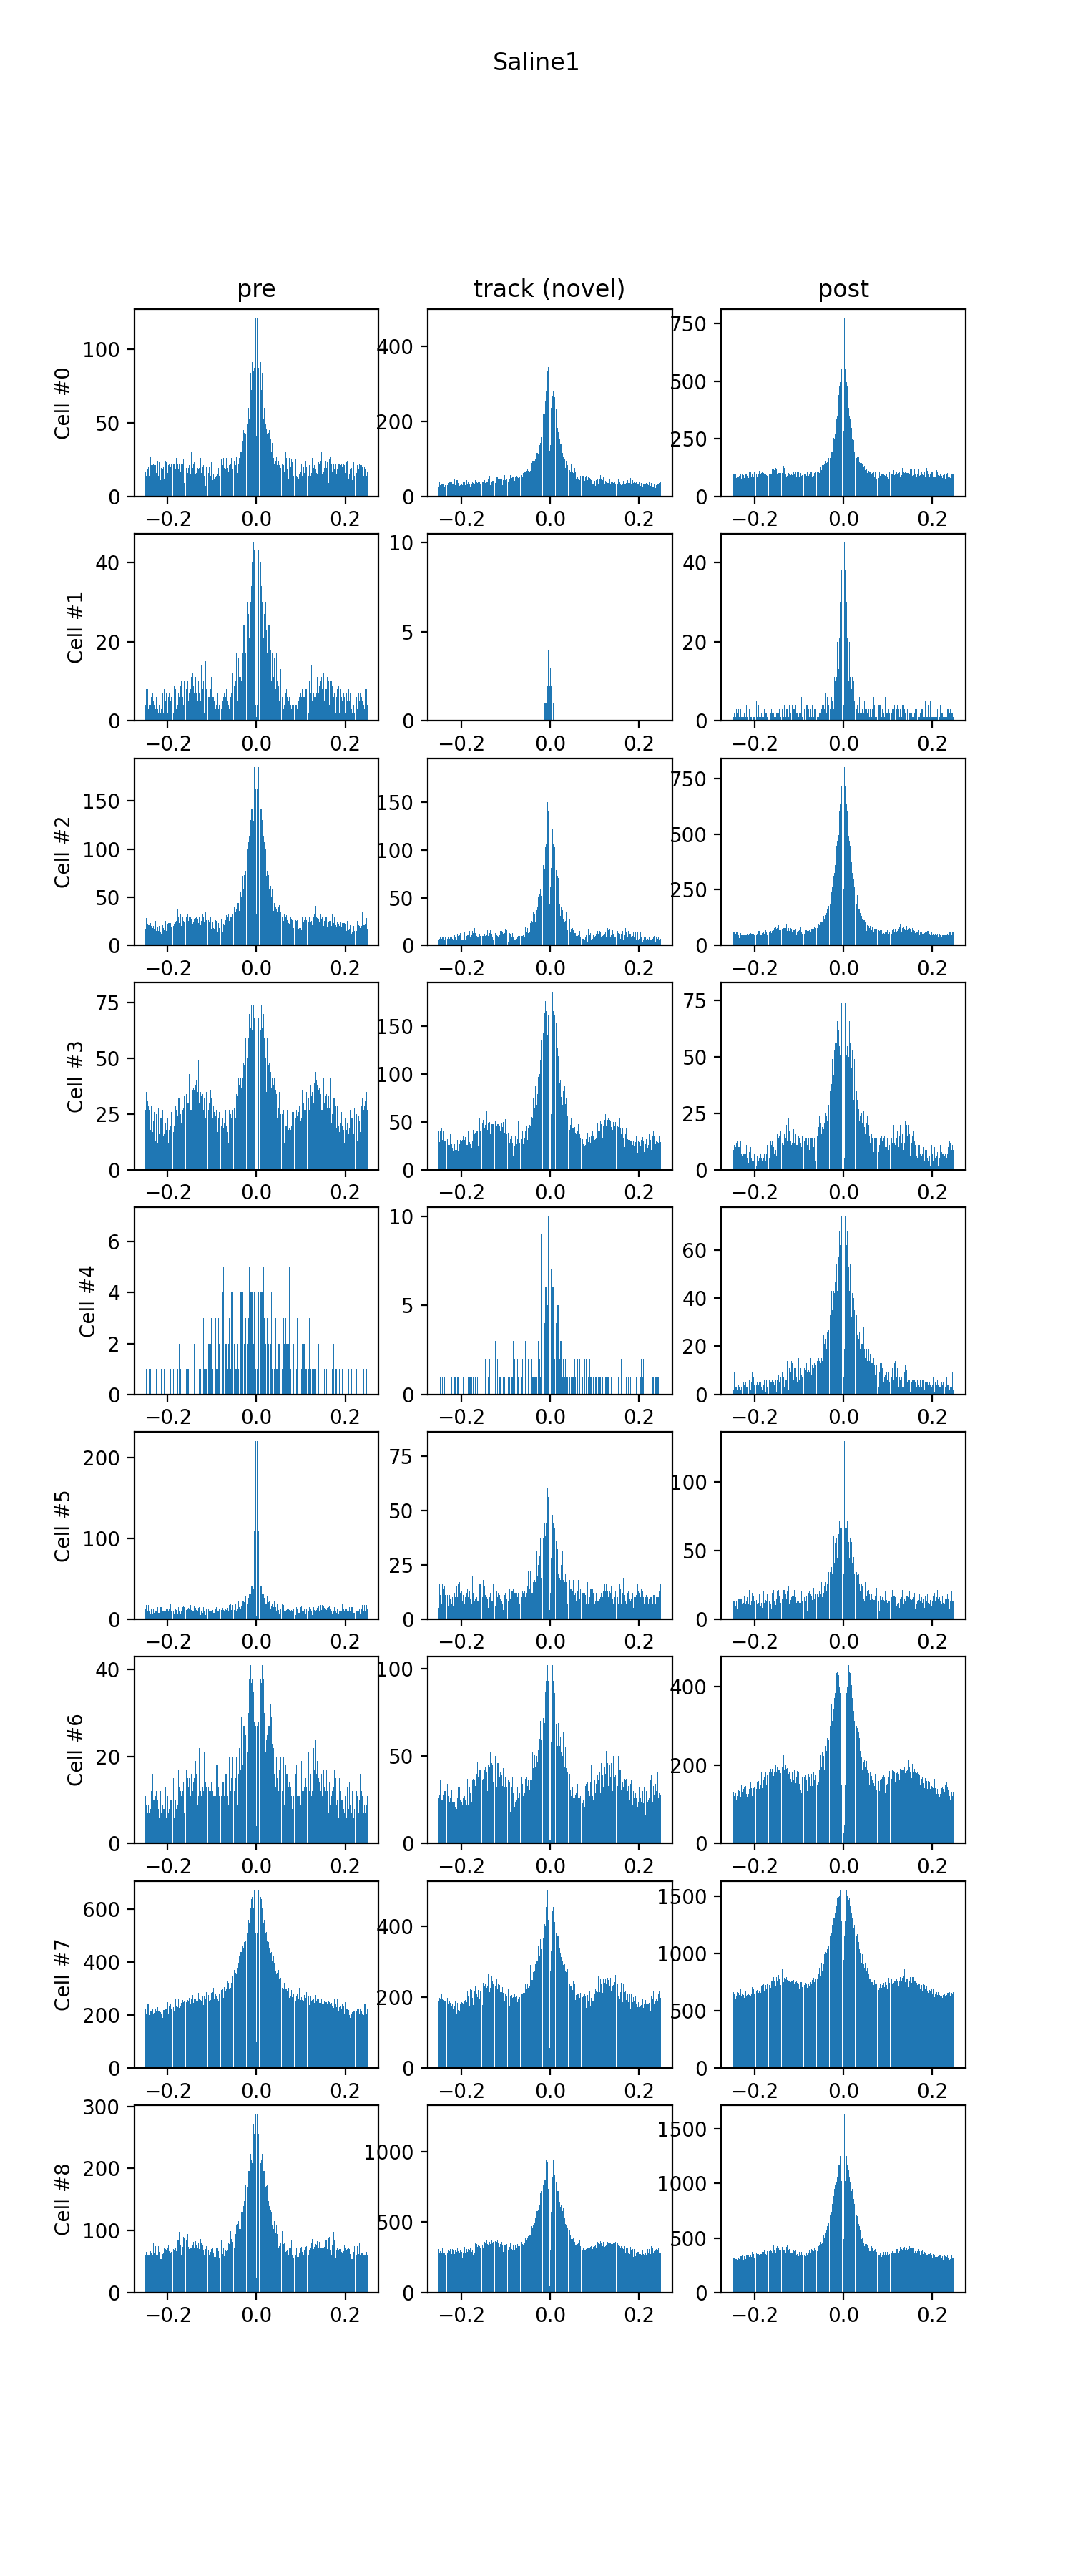

In [72]:
plot_ccg_by_epoch(corr_by_epoch_sal1, time_bins_sal1, epochs_used_sal1, 'Saline1')

In [52]:
ani_timestamps = get_dat_timestamps(working_dir / ani_folder)

start time = 2022-12-13 11:25:07
start time = 2022-12-13 11:44:12
start time = 2022-12-13 12:30:43
start time = 2022-12-13 15:19:03
start time = 2022-12-13 15:39:55
start time = 2022-12-13 15:47:14
start time = 2022-12-13 16:26:17


In [60]:
corr_by_epoch_ani, time_bins_ani, epochs_used_ani = calc_ccg_by_epoch(ani_folder, timestamps=ani_timestamps)

Calculating CCGs for epoch pre
Calculating CCGs for epoch injection
Calculating CCGs for epoch track 1 (novel)
Calculating CCGs for epoch post
Calculating CCGs for epoch track 2 (new config)
Calculating CCGs for epoch post 2


In [88]:
corr_by_epoch_anic, time_bins_anic, epochs_used_anic = calc_ccg_by_epoch(ani_folder, timestamps=ani_timestamps, 
                                                                        combine_units=True)

Calculating CCGs for epoch pre


IndexError: boolean index did not match indexed array along dimension 0; dimension is 1 but corresponding boolean dimension is 9

In [96]:
corr_by_epoch_anic.shape

(5, 9, 9, 501)

In [97]:
corr_by_epoch_anic[:, 0, 0, :].reshape((5, 1, 1, 501)).shape

(5, 1, 1, 501)

In [101]:
plt.gcf().get_size_inches()

array([12.5,  2. ])

<IPython.core.display.Javascript object>


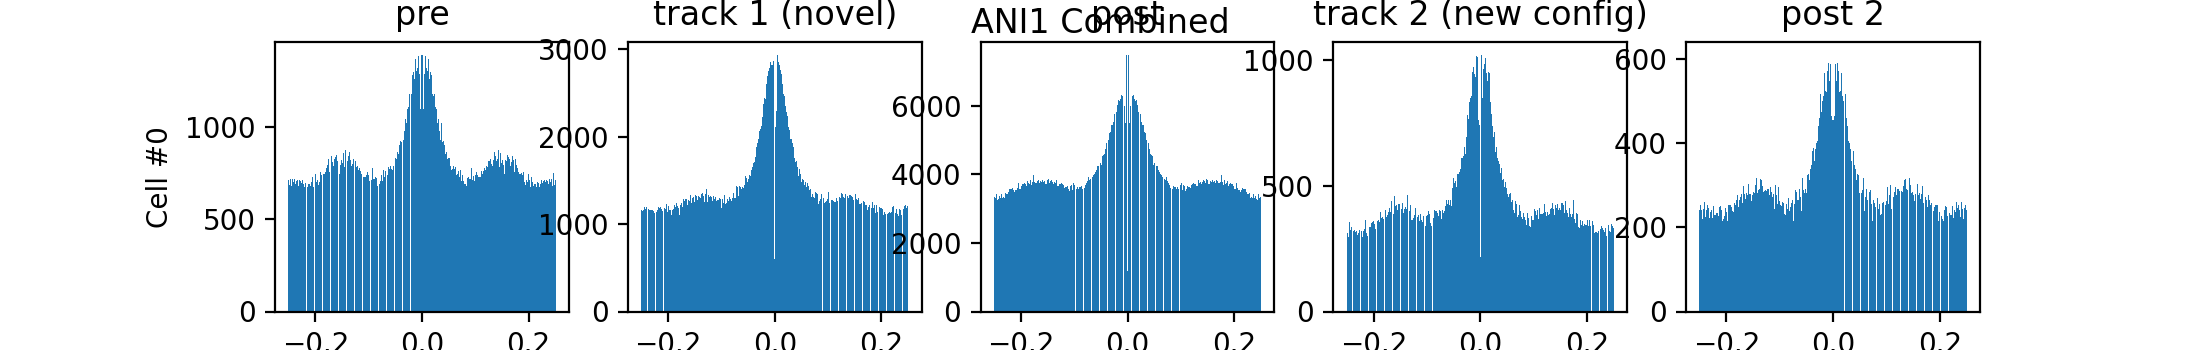

In [105]:
plot_ccg_by_epoch(corr_by_epoch_anic[:, 0, 0, :].reshape((corr_by_epoch_anic.shape[0], 1, 1, corr_by_epoch_anic.shape[3])), 
                  time_bins_anic, epochs_used_anic, 'ANI1 Combined')
plt.gcf().set_size_inches((11, 1.75))

<IPython.core.display.Javascript object>


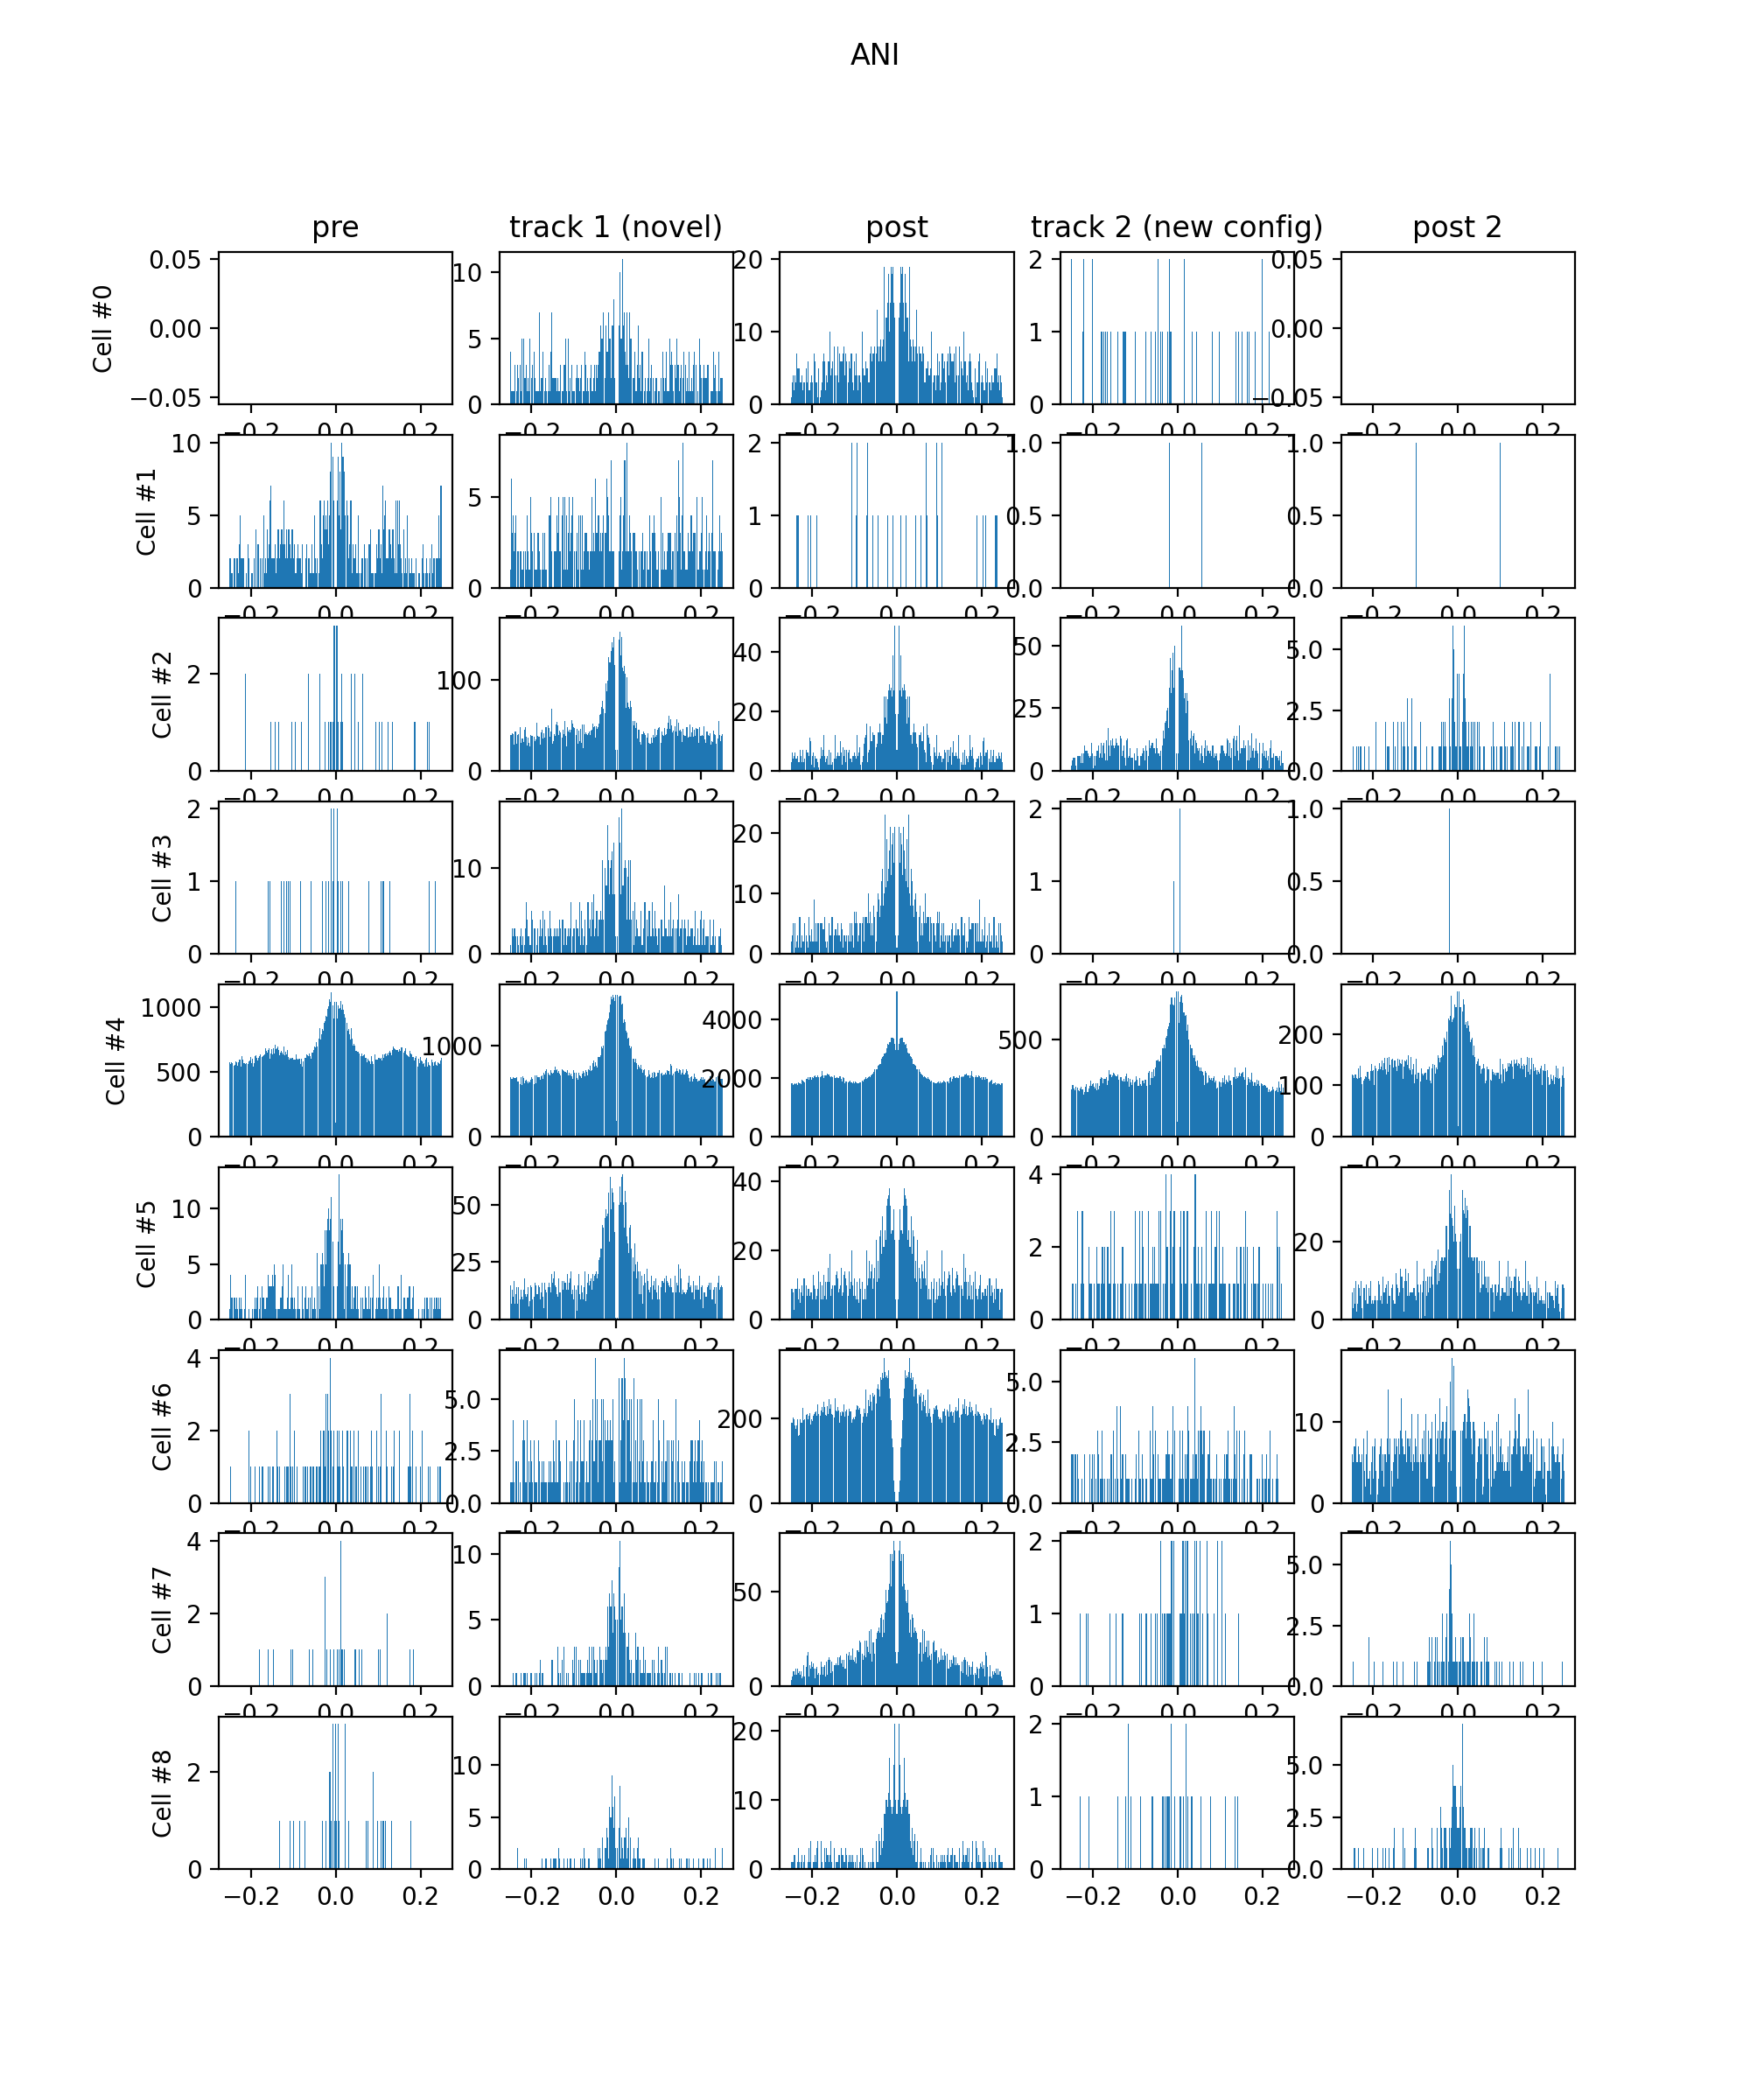

In [62]:
plot_ccg_by_epoch(corr_by_epoch_ani, time_bins_ani, epochs_used_ani, 'ANI')
plt.gcf().set_size_inches((10, 12))

In [73]:
ani2_timestamps = get_dat_timestamps(working_dir / ani2_folder)

start time = 2022-12-15 10:38:59
start time = 2022-12-15 11:06:55
start time = 2022-12-15 11:14:59
start time = 2022-12-15 11:47:01
start time = 2022-12-15 15:24:28


In [74]:
corr_by_epoch_ani2, time_bins_ani2, epochs_used_ani2 = calc_ccg_by_epoch(ani2_folder, timestamps=ani2_timestamps)

Calculating CCGs for epoch pre
Calculating CCGs for epoch injection
Calculating CCGs for epoch track 1 (novel)
Calculating CCGs for epoch track 2 (familiar)
Calculating CCGs for epoch post
Calculating CCGs for epoch track 2 remaze (familiar)


In [84]:
corr_by_epoch_ani2c, time_bins_ani2c, epochs_used_ani2c = calc_ccg_by_epoch(ani2_folder, timestamps=ani2_timestamps,
                                                                           combine_units=True)

Calculating CCGs for epoch pre
Calculating CCGs for epoch injection
Calculating CCGs for epoch track 1 (novel)
Calculating CCGs for epoch track 2 (familiar)
Calculating CCGs for epoch post
Calculating CCGs for epoch track 2 remaze (familiar)


<IPython.core.display.Javascript object>


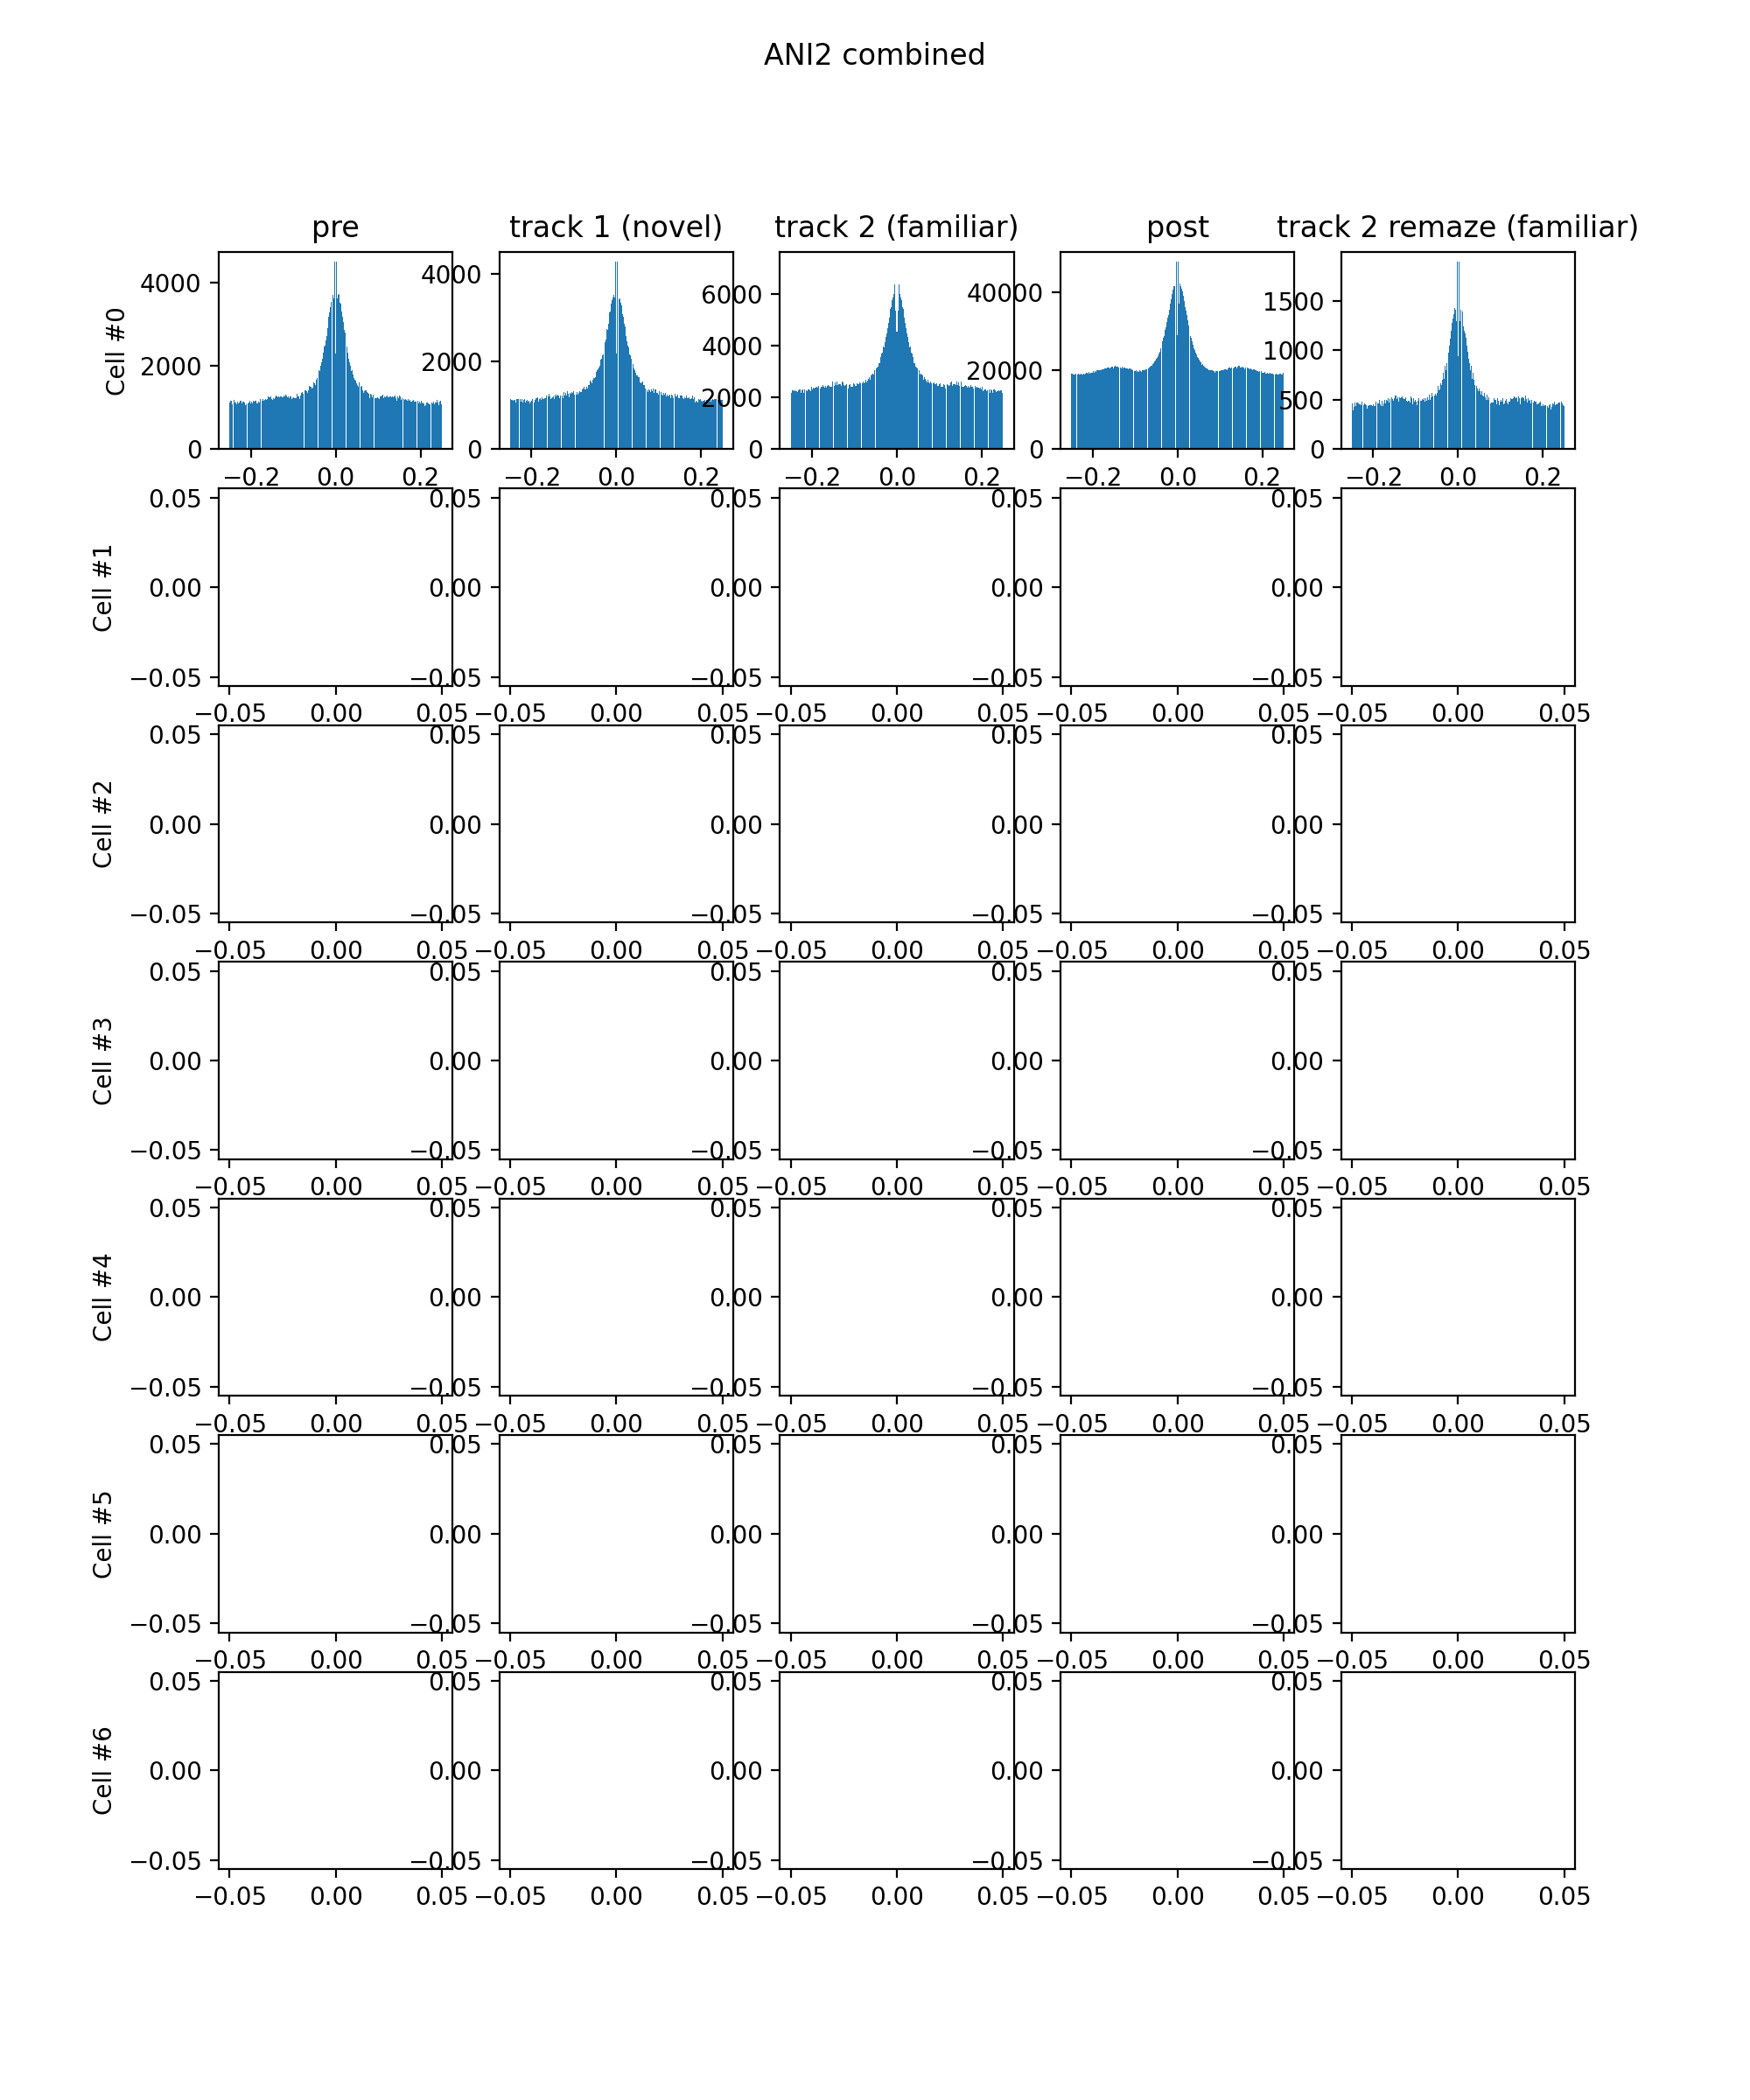

In [85]:
plot_ccg_by_epoch(corr_by_epoch_ani2c, time_bins_ani2c, epochs_used_ani2c, 'ANI2 combined')
plt.gcf().set_size_inches((10, 12))

In [4]:
saline3_timestamps = get_dat_timestamps(working_dir / saline3_folder)

start time = 2022-12-21 10:46:08
start time = 2022-12-21 11:03:37
start time = 2022-12-21 11:37:37
start time = 2022-12-21 11:42:48
start time = 2022-12-21 12:00:54
start time = 2022-12-21 13:12:27
start time = 2022-12-21 14:38:00
start time = 2022-12-21 15:08:23
start time = 2022-12-21 15:30:26
start time = 2022-12-21 15:41:36


In [5]:
corr_by_epoch_sal3, time_bins_sal3, epochs_used_sal3 = calc_ccg_by_epoch(saline3_folder, timestamps=saline3_timestamps)

Calculating CCGs for epoch pre
Calculating CCGs for epoch injection
Calculating CCGs for epoch track 1 (familiar)
Calculating CCGs for epoch post
Calculating CCGs for epoch track 2 (novel)
Calculating CCGs for epoch track 1 remaze (familiar)
Calculating CCGs for epoch post 2


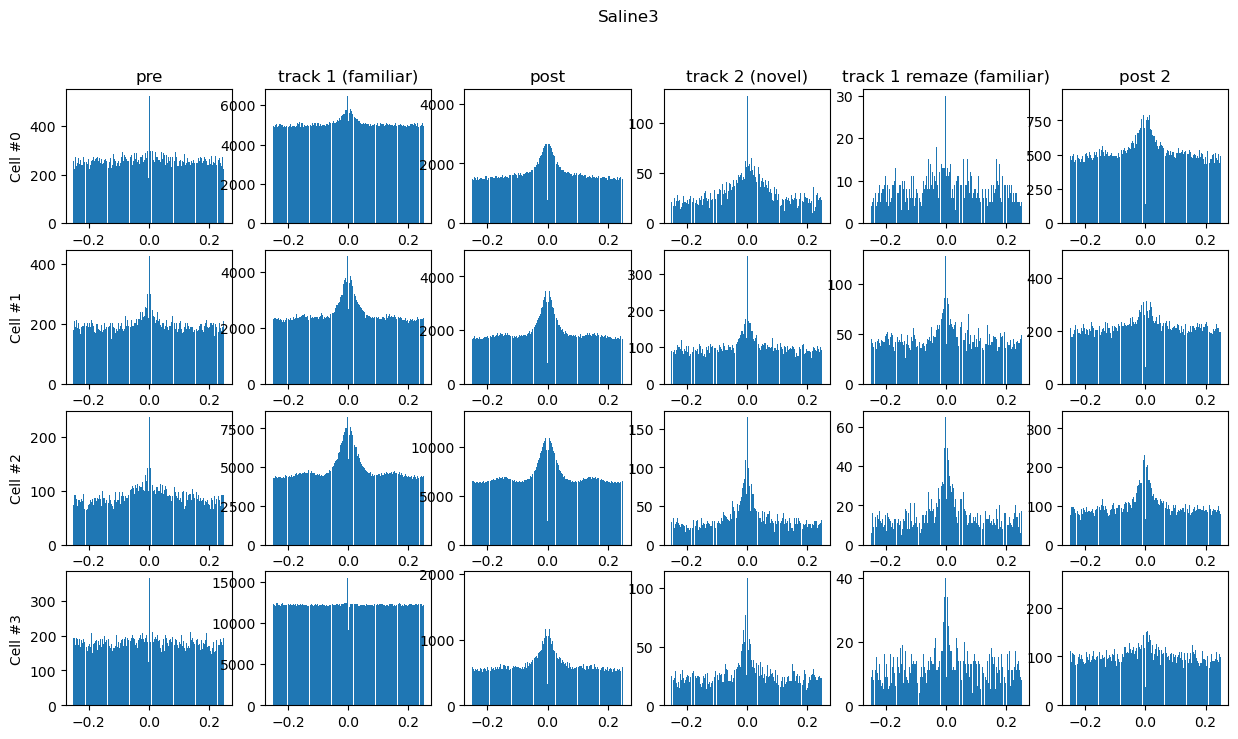

In [6]:
plot_ccg_by_epoch(corr_by_epoch_sal3, time_bins_sal3, epochs_used_sal3, 'Saline3')

In [ ]:
plot_ccg_by_epoch(corr_by_epoch_sal3, time_bins_sal3, epochs_used_sal3, 'Saline3', xlims=(-0.03, 0.03))

In [ ]:
folder_use = ani_folder
spyk_circ_dir = working_dir / folder_use / 'spyk-circ'
unit_dir = sorted(spyk_circ_dir.glob("**/spike_times.npy"))[0].parent

clu_info_file = unit_dir / "cluster_info.tsv"

In [ ]:
folder_use = saline3_folder
spyk_circ_dir = working_dir / folder_use / 'spyk-circ'
unit_dir = sorted(spyk_circ_dir.glob("**/spike_times.npy"))[0].parent

spyk_circ_dir = working_dir / folder_use / 'spyk-circ'
unit_dir = sorted(spyk_circ_dir.glob("**/spike_times.npy"))[0].parent

clu_file = unit_dir / "spike_clusters.npy"
time_file = unit_dir / "spike_times.npy"
clu_file

In [ ]:
def get_cluster_info(folder_use, keep_good_only=True):
    """Grabs cluster info and returns a dataframe, keeping only good units (those with an entry in their 'q' field)
    by default"""
    spyk_circ_dir = working_dir / folder_use / 'spyk-circ'
    unit_dir = sorted(spyk_circ_dir.glob("**/spike_times.npy"))[0].parent

    clu_info_file = unit_dir / "cluster_info.tsv"
    
    clu_info_df = pd.read_csv(clu_info_file, sep="\t")
    
    if keep_good_only and 'q' in clu_info_df.keys():
        return clu_info_df[~np.isnan(clu_info_df["q"])]
    else:
        return clu_info_df

In [ ]:
def load_events_csv(events_file_dir, start_time):
    events_file_dir = working_dir / events_file_dir
    events_file = sorted(Path(events_file_dir).glob("*_events_full.csv"))[0]
    events_df = pd.read_csv(events_file)
    day_offset = pd.tseries.offsets.DateOffset(days=(start_time[0].date() - 
                                                     pd.to_datetime(events_df['start']).dt.date[0]).days)
    starts = pd.to_datetime(events_df['start']) + day_offset
    stops = pd.to_datetime(events_df['stop']) + day_offset
    epochs = pd.DataFrame({'start': starts, 'stop': stops, 'label': events_df['label']})
    
    return epochs

ani_timestamps = get_dat_timestamps(working_dir / ani_folder)
epochs_test = load_events_csv(working_dir / saline3_folder, ani_timestamps.iloc[0])
epochs_test

In [ ]:
# Grab single units from phy and turn into MUA
SR = 30000
folder_use = saline1_folder 
spyk_circ_dir = working_dir / folder_use / 'spyk-circ'
unit_dir = sorted(spyk_circ_dir.glob("**/spike_times.npy"))[0].parent

clu_file = unit_dir / "spike_clusters.npy"
time_file = unit_dir / "spike_times.npy"

clu_id = np.load(clu_file)
sp_id = np.load(time_file)
spike_times = sp_id / SR


In [ ]:
def get_single_units(folder_use, SR=30000, keep_separate=False):
    spyk_circ_dir = working_dir / folder_use / 'spyk-circ'
    unit_dir = sorted(spyk_circ_dir.glob("**/spike_times.npy"))[0].parent

    clu_file = unit_dir / "spike_clusters.npy"
    time_file = unit_dir / "spike_times.npy"

    clu_id = np.load(clu_file)
    sp_id = np.load(time_file)
    
    if not keep_separate:
        spike_times = sp_id / SR

        return spike_times, clu_id
    else:
        spike_times = []
        for clu in np.unique(clu_id):
            spike_times.append(np.array(sp_id[clu_id == clu] / SR))
        
        return spike_times, clu_id


In [ ]:
def calc_burst_index(sp_times, burst_thresh_ms=8, nspikes_min=3):
    """3 or more spikes fired with less than 8ms ISI per Mizuseki and Buzsaki (2013)"""
    
    nspikes_total = len(sp_times)
    isi = np.diff(sp_times)  # calculate iSI
    isi_thresh = isi < burst_thresh_ms/1000  # ID spikes with ISI < thresh
    cand_burst_events = contiguous_regions(isi_thresh) # ID start and end of candidate burst events
    nspikes_per_event = np.diff(cand_burst_events, axis=1).reshape(-1) + 1  # count up spikes in each event
    burst_event_bool = nspikes_per_event >= nspikes_min # ID events with >= nspikes_min spikes
    nburst_spikes = nspikes_per_event[burst_event_bool].sum()  # Grab # spikes in all burst
    
    return nburst_spikes / nspikes_total


In [ ]:
## Convert datetime epochs to times matching the .dat file or .eeg file and export to neuroscope format!
from neuropy.io.neuroscopeio import NeuroscopeIO
from neuropy.core.epoch import Epoch

def epochs_to_neuroscope(session_folder, timestamps=None):


    # session_folder = saline3_folder
    # timestamps = None

    if timestamps is None:
        timestamps = get_dat_timestamps(working_dir / session_folder)

    epochs = load_events_csv(working_dir / session_folder, timestamps.iloc[0])

    ts = timestamps.squeeze()  # make timestamps into a series

    starts, stops = [], []
    for epoch in epochs['label']:
        epoch_use = epochs[epochs['label'] == epoch]
        start_sec = ts.searchsorted(epoch_use['start']).squeeze()/SR
        stop_sec = ts.searchsorted(epoch_use['stop']).squeeze()/SR
        starts.append(start_sec)
        stops.append(stop_sec)

    epochs_out = pd.DataFrame({"start": starts, "stop": stops, "label": epochs["label"]})
    epochs_out = Epoch(epochs_out)
    recinfo = NeuroscopeIO(sorted((working_dir / session_folder).glob("*.xml"))[0])
    recinfo.write_epochs(epochs_out)
    
    return epochs_out

saline3_timestamps = get_dat_timestamps(working_dir / saline3_folder)
epochs_to_neuroscope(saline3_folder, timestamps=saline3_timestamps)
    

In [ ]:
sorted((working_dir / folder).glob("*.xml"))[0]

In [ ]:
for folder in [saline1_folder, ani_folder, saline2_folder, ani2_folder, rec_only_folder, saline3_folder]:
    epochs_to_neuroscope(folder)

In [ ]:
# develop calc_burst_index with unit 42 from ani session
spike_times, clu_ids = get_single_units(working_dir / ani_folder)

sp_times = spike_times[clu_ids == 97]

burst_thresh_ms = 8
nspikes_min = 3

nspikes_total = len(sp_times)
isi = np.diff(sp_times)
isi_thresh = isi < burst_thresh_ms/1000
cand_burst_events = contiguous_regions(isi_thresh)
nspikes_per_event = np.diff(cand_burst_events, axis=1).reshape(-1) + 1
burst_event_bool = nspikes_per_event >= nspikes_min
nburst_spikes = nspikes_per_event[burst_event_bool].sum()

nspikes_per_event[burst_event_bool].sum()/len(sp_times)

In [ ]:
calc_burst_index(spike_times[clu_ids == 97])

In [ ]:
# Load in events file for ANI session
events_file = sorted((working_dir / ani_folder).glob("*_events.csv"))[0]
events_df = pd.read_csv(events_file)
a = pd.to_datetime(events_df['event time'])
events_df['event time'] = a + pd.tseries.offsets.DateOffset(days=(ani_start[0].date() - a.dt.date[0]).days)
start_str = ['track start', 'post start', 'track 2 start', 'post 2 start']

starts = []
starts.extend(ani_start.values)
for event in start_str:
    starts.extend(events_df[events_df['event name'] == event]['event time'].values)
    
stops = []
stops.extend(events_df[events_df['event name'] == 'injection']['event time'].values - pd.Timedelta(value=1, unit='s'))
for event in start_str[1:]:
    stops.extend(events_df[events_df['event name'] == event]['event time'].values - pd.Timedelta(value=1, unit='s'))
stops.extend(ani_timestamps.iloc[-1].values)

labels = ['pre', 'track', 'post', 'track 2', 'post 2']

ani_epochs = pd.DataFrame({'start': starts, 'stop': stops, 'label': labels})

In [ ]:
a2 = ani_timestamps.squeeze()

In [ ]:
from neuropy.io.openephysio import get_dat_timestamps
ani_timestamps = get_dat_timestamps(working_dir / ani_folder)

In [ ]:
# Calc burst index by epoch for ANI session

# this code selects spikes from the appropriate epoch
epoch_use = ani_epochs[ani_epochs['label'] == 'pre']

# Calc burst index by hour for ANI session
ani_clu_info = get_cluster_info(ani_folder, keep_good_only=True)
good_clu = ani_clu_info['cluster_id']
epochs = ['']

a2 = ani_timestamps.squeeze()

BI_by_epoch_all = []
for clu_id in good_clu:
    sp_times_use = spike_times[clu_id == clu_ids]
    BI_by_epoch = []
    for epoch in ani_epochs['label']:
        epoch_use = ani_epochs[ani_epochs['label'] == epoch]
        start_sec = a2.searchsorted(epoch_use['start'])/30000
        stop_sec = a2.searchsorted(epoch_use['stop'])/30000
        epoch_bool = np.bitwise_and(sp_times_use > start_sec, sp_times_use < stop_sec)

        BI_by_epoch.append(calc_burst_index(sp_times_use[epoch_bool]))
    BI_by_epoch_all.append(BI_by_epoch)
BI_by_epoch_all_ani = np.array(BI_by_epoch_all)
BI_by_epoch_all_ani

In [ ]:
# Calc burst index by hour for ANI session
ani_clu_info = get_cluster_info(ani_folder, keep_good_only=True)
good_clu = ani_clu_info['cluster_id']
hours = [0, 1, 2, 3, 4]

BI_by_hour_all = []
for clu_id in good_clu:
    sp_times_use = spike_times[clu_id == clu_ids]
    BI_by_hour = []
    for hour in hours:
        start_time = 60*hour*60
        end_time = 60*(hour + 1)*60
        hour_bool = np.bitwise_and(sp_times_use > start_time, sp_times_use < end_time)

        BI_by_hour.append(calc_burst_index(sp_times_use[hour_bool]))
    BI_by_hour_all.append(BI_by_hour)
BI_by_hour_all_ani = np.array(BI_by_hour_all)
BI_by_hour_all_ani

In [ ]:
saline3_timestamps = get_dat_timestamps(working_dir / saline3_folder)
saline3_start = saline3_timestamps.iloc[0]

In [ ]:
pd.to_datetime(events_df['stop'])

In [ ]:
sp_times_use

In [ ]:
spike_times, clu_ids = get_single_units(saline1_folder)
timestamps = get_dat_timestamps(working_dir / saline1_folder)
epochs = load_events_csv(working_dir / saline1_folder, timestamps.iloc[0])

In [ ]:
clu_list = np.unique(clu_ids)
n_units = len(clu_list)
ts = timestamps.squeeze() 
epoch_use = epochs[epochs['label'] == 'pre']
start_sec = ts.searchsorted(epoch_use['start'])/SR
stop_sec = ts.searchsorted(epoch_use['stop'])/SR
epoch_bool = np.bitwise_and(spike_times > start_sec, spike_times < stop_sec)
clu_active = np.unique(clu_ids[epoch_bool])
nactive = clu_bool.sum()
corr_temp = np.ones((n_units, n_units, len(time_bins)))*np.nan
clu_bool = np.array([clu in clu_active for clu in clu_list])

corr_temp2 = correlograms(spike_times[epoch_bool], clu_ids[epoch_bool], 
                                     bin_size=bin_size, sample_rate=SR, window_size=window_size)

In [ ]:
corr_temp[np.outer(clu_bool, clu_bool), :] = corr_temp2.reshape(nactive*nactive, -1)

In [ ]:
corr_temp = np.ones((n_units, n_units, len(time_bins)))*np.nan
clu_bool = np.array([clu in clu_active for clu in clu_list])
nactive = clu_bool.sum()
corr_temp[np.outer(clu_bool, clu_bool), :].shape

In [ ]:
42*42

In [ ]:
np.outer(clu_bool, clu_bool).shape

In [ ]:
corr_temp[clu_bool][:, clu_bool] = np.ones(corr_temp[clu_bool][:, clu_bool].shape)

In [ ]:
corr_temp = np.ones((3, 3, 3))
good_bool = np.array([True, False, True])
corr_temp[good_bool, good_bool, :] = 0
corr_temp

In [ ]:
clu_info["cluster_id"].values

In [ ]:
good_clu = clu_info["cluster_id"]

In [ ]:
good_clu

In [ ]:
saline1_timestamps = get_dat_timestamps(working_dir / saline1_folder)

In [ ]:
np.unique(clu_ids)

In [ ]:
np.unique(clu_ids[good_clu_bool])

In [ ]:
# Calculate CCGs by epoch
def calc_ccg_by_epoch(session_folder, timestamps=None, SR=30000, window_size=0.5, bin_size=0.001):
    """Calculate CCG between all cells across each epoch of the recording"""
    # Load timestamps if not done already
    if timestamps is None:
        timestamps = get_dat_timestamps(working_dir / session_folder)

    spike_times, clu_ids = get_single_units(session_folder, keep_separate=False)
    #     clu_list = np.unique(clu_ids)
    #     n_units = len(clu_list)

    clu_info = get_cluster_info(session_folder, keep_good_only=True)
    good_clu = clu_info['cluster_id'].values
    n_units = len(good_clu)

    good_clu_bool = [clu_id in good_clu for clu_id in clu_ids]
    epochs = load_events_csv(working_dir / session_folder, timestamps.iloc[0])

    ts = timestamps.squeeze()  # Make timestamps into a series

    corr_by_epoch = []
    epochs_used = []
    time_bins = np.arange(0, int(window_size/bin_size) + 1)
    #     time_bins = np.linspace(-window_size/2, window_size/2, int(window_size/bin_size) + 1)
    for epoch in epochs['label']:
        print(f'Calculating CCGs for epoch {epoch}')
        epoch_use = epochs[epochs['label'] == epoch]
        start_sec = ts.searchsorted(epoch_use['start'])/SR
        stop_sec = ts.searchsorted(epoch_use['stop'])/SR
        if start_sec != stop_sec:  # Skip the below for injection or any epoch with no data!
            epoch_bool = np.bitwise_and(spike_times > start_sec, spike_times < stop_sec)
            epoch_bool = np.bitwise_and(epoch_bool, good_clu_bool)

#             print(f'# Spikes for units in {epoch} epoch:')
#             print([np.sum(clu == clu_ids[epoch_bool]) for clu in np.unique(clu_ids[epoch_bool])])

            clu_active = np.unique(clu_ids[epoch_bool])
            corr_temp = np.ones((n_units, n_units, len(time_bins)))*np.nan  # pre-allocate
            active_clu_bool = np.array([clu in clu_active for clu in good_clu])  # find all neurons with a spike in this epoch

            corr_temp2 = correlograms(spike_times[epoch_bool], clu_ids[epoch_bool], 
                                     bin_size=bin_size, sample_rate=SR, window_size=window_size)

            nactive = active_clu_bool.sum()
            assert nactive == len(clu_active)

            # Dump active neurons into the right spot in the ccg array
            corr_temp[np.outer(active_clu_bool, active_clu_bool), :] = corr_temp2.reshape(nactive*nactive, -1)

            corr_by_epoch.append(corr_temp)
            epochs_used.append(epoch)

    corr_by_epoch = np.array(corr_by_epoch)

    return corr_by_epoch, time_bins, epochs_used
    
corr_by_epoch_sal1, time_bins_sal1, epochs_used_sal1 = calc_ccg_by_epoch(saline1_folder, timestamps=saline1_timestamps)

In [ ]:
def plot_ccg_by_epoch(corr_by_epoch_use, time_bins_use, epochs_use, session_name):
    """Plot ccgs by epoch"""
    
    bin_width = np.diff(time_bins_use).mean() * 0.95
    ncells, nepochs = corr_by_epoch_use.shape[1], corr_by_epoch_use.shape[0]
    fig, ax = plt.subplots(ncells, nepochs, figsize=(2.5*nepochs, 2*ncells))
    fig.suptitle(session_name)

    for ae, corr_epoch in zip(ax.T, corr_by_epoch_use):
        for ida, a in enumerate(ae):
            a.bar(time_bins_use, corr_epoch[ida, ida], width=bin_width)

    for atop, epoch in zip(ax[0, :], epochs_use):
        atop.set_title(epoch)

    [aside.set_ylabel(f'Cell #{ida}') for ida, aside in enumerate(ax[:,0])];

plot_ccg_by_epoch(corr_by_epoch_sal1, time_bins_sal1, epochs_used_sal1, 'Saline1')

In [ ]:
corr_by_epoch_ani1, time_bins_ani1, epochs_used_ani1 = calc_ccg_by_epoch(ani_folder, 
                                                                         timestamps=ani_timestamps)
plot_ccg_by_epoch(corr_by_epoch_ani1, time_bins_ani1, epochs_used_ani1, 'Anisomycin1')

In [ ]:
saline3_timestamps = get_dat_timestamps(working_dir / saline3_folder)

In [ ]:
get_cluster_info(saline3_folder)

In [ ]:
corr_by_epoch_sal3, time_bins_sal3, epochs_used_sal3 = calc_ccg_by_epoch(saline3_folder, 
                                                                         timestamps=saline3_timestamps)
plot_ccg_by_epoch(corr_by_epoch_sal3, time_bins_sal3, epochs_used_sal3, 'Saline3')

In [ ]:
# Calculate burst index by epoch
def calc_burst_ind_by_epoch(session_folder, timestamps=None, SR=30000):
    """Calculate burst index by epoch"""
    # Load timestamps if not done already
    if timestamps is None:
        timestamps = get_dat_timestamps(working_dir / session_folder)

    spike_times, clu_ids = get_single_units(session_folder, keep_separate=False)

    clu_info = get_cluster_info(session_folder, keep_good_only=True)
    good_clu = clu_info['cluster_id']
    epochs = load_events_csv(working_dir / session_folder, timestamps.iloc[0])

    ts = timestamps.squeeze()  # Make timestamps into a series

    BI_by_epoch_all = []
    for clu_id in good_clu:
        sp_times_use = spike_times[clu_id == clu_ids]
        BI_by_epoch = []
        epochs_used = []
        for epoch in epochs['label']:
            epoch_use = epochs[epochs['label'] == epoch]
            start_sec = ts.searchsorted(epoch_use['start'])/SR
            stop_sec = ts.searchsorted(epoch_use['stop'])/SR
            if start_sec != stop_sec:  # Skip the below for injection or any epoch with no data!
                epoch_bool = np.bitwise_and(sp_times_use > start_sec, sp_times_use < stop_sec)
                BI_by_epoch.append(calc_burst_index(sp_times_use[epoch_bool]))
                epochs_used.append(epoch)
#             else:
#                 print(f'No data found for {epoch} epoch. Skipping')  
        BI_by_epoch_all.append(BI_by_epoch)
    BI_by_epoch_all = np.array(BI_by_epoch_all)
    assert BI_by_epoch_all.shape[1] == len(epochs_used), 'epochs data does not match BI data, check code'
    
    return epochs_used, BI_by_epoch_all

epochs_used_test, BI_by_epoch_test = calc_burst_ind_by_epoch(working_dir / saline3_folder, 
                                                             timestamps=saline3_timestamps)
print(epochs_used_test)
BI_by_epoch_test

In [7]:
epochs_sal1, BI_by_epoch_sal1 = calc_burst_ind_by_epoch(working_dir / saline1_folder)

start time = 2022-12-12 12:20:06
start time = 2022-12-12 12:40:17
start time = 2022-12-12 13:12:26
start time = 2022-12-12 13:16:46


In [22]:
# _, ax = plt.subplots()
# ax.plot(BI_by_epoch_sal1.T)

In [9]:
epochs_sal2, BI_by_epoch_sal2 = calc_burst_ind_by_epoch(working_dir / saline2_folder)
BI_by_epoch_sal2

start time = 2022-12-14 12:21:48
start time = 2022-12-14 12:48:07
start time = 2022-12-14 13:22:56
start time = 2022-12-14 13:43:34


array([[0.10666667, 0.07548638, 0.21076233, 0.07365439],
       [0.03661417, 0.10391276, 0.11410838, 0.0552072 ],
       [0.01734104, 0.04191447, 0.01701094, 0.03592561],
       [0.        , 0.        , 0.07022472, 0.4829932 ],
       [0.10851064, 0.08823529, 0.        , 0.12      ],
       [0.08453281, 0.19946265, 0.09774116, 0.07280514],
       [0.13701322, 0.19986419, 0.13053892, 0.15450781]])

In [23]:
# _, ax = plt.subplots()
# ax.plot(BI_by_epoch_sal2.T);

In [11]:
ani_timestamps = get_dat_timestamps( working_dir / ani_folder )

start time = 2022-12-13 11:25:07
start time = 2022-12-13 11:44:12
start time = 2022-12-13 12:30:43
start time = 2022-12-13 15:19:03
start time = 2022-12-13 15:39:55
start time = 2022-12-13 15:47:14
start time = 2022-12-13 16:26:17


In [15]:
epochs_ani2, BI_by_epoch_ani2 = calc_burst_ind_by_epoch(working_dir / ani2_folder)

In [16]:
epochs_reconly, BI_by_epoch_reconly = calc_burst_ind_by_epoch(working_dir / rec_only_folder)

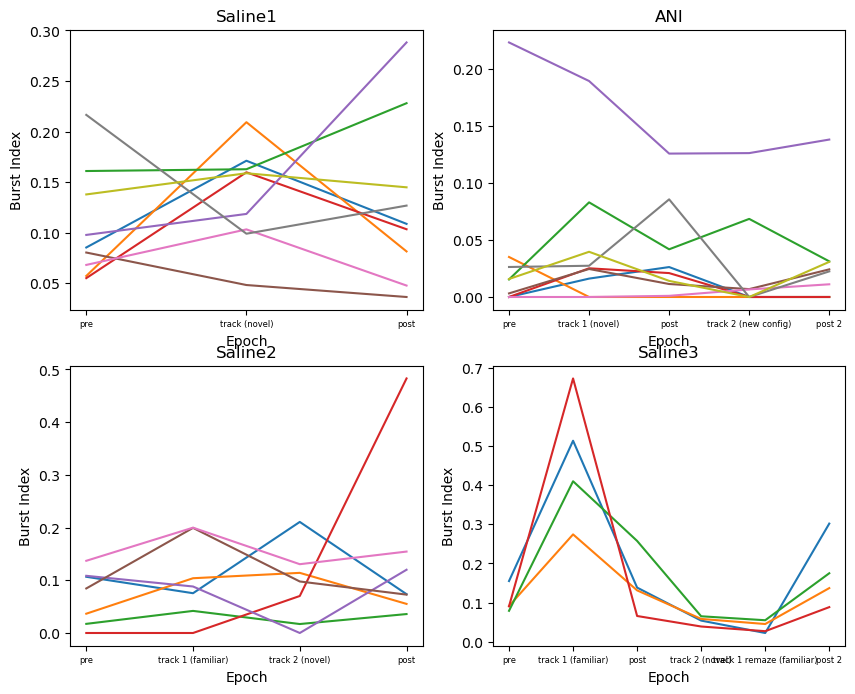

In [21]:
_, ax = plt.subplots(2, 2, figsize=(10, 8))

for a, title, BI_by_epoch, labels in zip(ax.reshape(-1), ['Saline1', 'ANI', 'Saline2', 'Saline3'], 
                                 [BI_by_epoch_sal1, BI_by_epoch_ani, BI_by_epoch_sal2, BI_by_epoch_sal3],
                                 [epochs_sal1, epochs_ani, epochs_sal2, epochs_sal3]):
    a.plot(BI_by_epoch.T)
    a.set_title(title)
    a.set_xlabel('Epoch')
    a.set_xticks(np.arange(len(labels)))
    a.set_xticklabels(labels, fontdict={'fontsize': 6})
    a.set_ylabel('Burst Index')

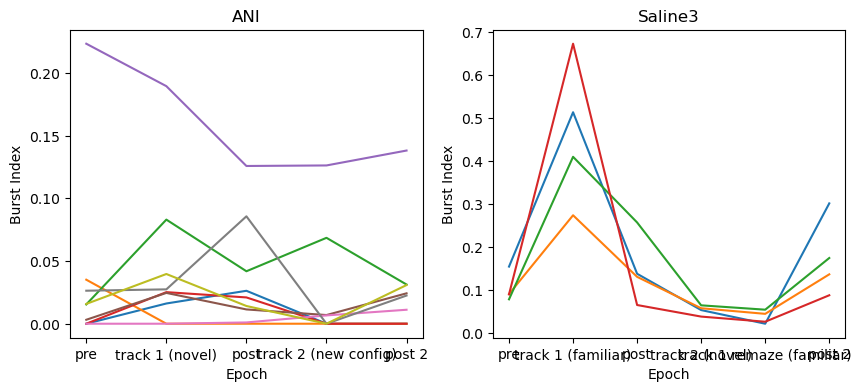

In [12]:
_, ax = plt.subplots(1, 2, figsize=(10, 4))

epochs_ani, BI_by_epoch_ani = calc_burst_ind_by_epoch(working_dir / ani_folder, 
                                                             timestamps=ani_timestamps)
ax[0].plot(BI_by_epoch_ani.T)
ax[0].set_title('ANI')

epochs_sal3, BI_by_epoch_sal3 = calc_burst_ind_by_epoch(working_dir / saline3_folder, 
                                                             timestamps=saline3_timestamps)

ax[1].plot(BI_by_epoch_sal3.T)
ax[1].set_title('Saline3')

for a, labels in zip(ax, [epochs_ani, epochs_sal3]):
    a.set_xlabel('Epoch')
    a.set_xticks(np.arange(len(labels)))
    a.set_xticklabels(labels)
    a.set_ylabel('Burst Index')

In [ ]:
# Load in events file for saline3 session
events_file = sorted((working_dir / saline3_folder).glob("*_events.csv"))[0]
events_df = pd.read_csv(events_file)
a = pd.to_datetime(events_df['event time'])
events_df['event time'] = a + pd.tseries.offsets.DateOffset(days=(saline3_start[0].date() - a.dt.date[0]).days)
start_str = ['track start', 'post start', 'track 2 start', 'post 2 start']

starts = []
starts.extend(saline3_start.values)
for event in start_str:
    starts.extend(events_df[events_df['event name'] == event]['event time'].values)
    
stops = []
stops.extend(events_df[events_df['event name'] == 'injection']['event time'].values - pd.Timedelta(value=1, unit='s'))
for event in start_str[1:]:
    stops.extend(events_df[events_df['event name'] == event]['event time'].values - pd.Timedelta(value=1, unit='s'))
stops.extend(saline3_timestamps.iloc[-1].values)

labels = ['pre', 'track', 'post', 'track 2', 'post 2']

saline3_epochs = pd.DataFrame({'start': starts, 'stop': stops, 'label': labels})
saline3_epochs

In [ ]:
# Calc burst index by epoch for Saline3 session
spike_times_s3, clu_ids_s3 = get_single_units(saline3_folder, keep_separate=False)

# Calc burst index by hour for ANI session
saline3_clu_info = get_cluster_info(saline3_folder, keep_good_only=True)
good_clu = saline3_clu_info['cluster_id']
epochs = ['']

s2 = saline3_timestamps.squeeze()

BI_by_epoch_all = []
for clu_id in good_clu:
    sp_times_use = spike_times_s3[clu_id == clu_ids_s3]
    BI_by_epoch = []
    for epoch in saline3_epochs['label']:
        epoch_use = saline3_epochs[saline3_epochs['label'] == epoch]
        start_sec = s2.searchsorted(epoch_use['start'])/30000
        stop_sec = s2.searchsorted(epoch_use['stop'])/30000
        epoch_bool = np.bitwise_and(sp_times_use > start_sec, sp_times_use < stop_sec)

        BI_by_epoch.append(calc_burst_index(sp_times_use[epoch_bool]))
    BI_by_epoch_all.append(BI_by_epoch)
BI_by_epoch_all_sal3 = np.array(BI_by_epoch_all)
BI_by_epoch_all_sal3

In [ ]:
# Ditto for saline 3 cell
sal3_clu_info = get_cluster_info(saline3_folder, keep_good_only=True)
hours = [0, 1, 2, 3, 4]
BI_by_hour_all = []
for clu_id in sal3_clu_info['cluster_id']:
    BI_by_hour = []

    sp_times_use = spike_times_s3[clu_id == clu_ids_s3]
    for hour in hours:
        start_time = 60*hour*60
        end_time = 60*(hour + 1)*60
        hour_bool = np.bitwise_and(sp_times_use > start_time, sp_times_use < end_time)

        BI_by_hour.append(calc_burst_index(sp_times_use[hour_bool]))
    BI_by_hour_all.append(BI_by_hour)
BI_by_hour_all_sal3 = np.array(BI_by_hour_all)
BI_by_hour_all_sal3

In [ ]:
_.get_size_inches()

In [ ]:
labels

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].plot(BI_by_epoch_all_ani.T)
ax[0].set_title('ANI')

ax[1].plot(BI_by_epoch_all_sal3.T)
ax[1].set_title('Saline3')

for a in ax:
    a.set_xlabel('Epoch')
    a.set_xticks(np.arange(len(labels)))
    a.set_xticklabels(labels)
    a.set_ylabel('Burst Index')

In [ ]:
saline3_timestamps.iloc[228674080]

In [ ]:
print(f"headstage loose at {saline3_timestamps.squeeze().searchsorted('2022-12-21 13:01:48')/30000} sec")

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].plot(BI_by_hour_all_ani.T)
ax[0].set_title('ANI')

ax[1].plot(BI_by_hour_all_sal3.T)
ax[1].set_title('Saline3')

for a in ax:
    a.set_xlabel('Hour')
    a.set_xticks(hours)
    a.set_ylabel('Burst Index')

In [ ]:
# ID times when animal gets injection, when animal is on track, post recording, and track2 to get a better sense of things

In [ ]:
ani_start = ani_timestamps.iloc[0]

In [ ]:
events_file = sorted((working_dir / ani_folder).glob("*_events.csv"))[0]
events_df = pd.read_csv(events_file)
start_str = ['track start', 'post start', 'track 2 start', 'post 2 start']


starts = []
starts.extend(ani_start.values)
for event in start_str:
    starts.extend(events_df[events_df['event name'] == event]['event time'].values)
    
stops = []
stops.extend(events_df[events_df['event name'] == 'injection']['event time'].values - pd.Timedelta(value=1, unit='s'))
for event in start_str[1:]:
    stops.extend(events_df[events_df['event name'] == event]['event time'].values - pd.Timedelta(value=1, unit='s'))
stops.extend(ani_timestamps.iloc[-1].values)

labels = ['pre', 'track', 'post', 'track 2', 'post 2']

ani_epochs = pd.DataFrame({'start': starts, 'stop': stops, 'label': labels})

# this code selects spikes from the appropriate epoch
epoch_use = ani_epochs[ani_epochs['label'] == 'pre']
start_sec = (epoch_use['start'] - ani_start).dt.total_seconds()
stop_sec = (epoch_use['stop'] - ani_start).dt.total_seconds()
epoch_bool = np.bitwise_and(spike_times > start_sec.values, spike_times < stop_sec.values)

In [ ]:
a = pd.to_datetime(events_df['event time'])
events_df['event time'] = a + pd.tseries.offsets.DateOffset(days=(ani_start[0].date() - a.dt.date[0]).days)

In [ ]:
events_df 

In [ ]:
start_str = ['track start', 'post start', 'track 2 start', 'post 2 start']
starts = []
starts.extend(ani_start.values)
for event in start_str:
    starts.extend(events_df[events_df['event name'] == event]['event time'].values)

In [ ]:
stops = []
stops.extend(events_df[events_df['event name'] == 'injection']['event time'].values - pd.Timedelta(value=1, unit='s'))
for event in start_str[1:]:
    stops.extend(events_df[events_df['event name'] == event]['event time'].values - pd.Timedelta(value=1, unit='s'))
stops.extend(ani_timestamps.iloc[-1].values)

In [ ]:
starts

In [ ]:
events_df[events_df['event name'] == 'injection']['event time'].values - pd.Timedelta(value=1, unit='s')

In [ ]:
labels = ['pre', 'track', 'post', 'track 2', 'post 2']

In [ ]:
ani_epochs = pd.DataFrame({'start': starts, 'stop': stops, 'label': labels})

In [ ]:
spike_times

In [ ]:
(epoch_use['stop'] - ani_start).dt.total_seconds()

In [ ]:
start_sec.values

In [ ]:
# this code selects spikes from the appropriate epoch
epoch_use = ani_epochs[ani_epochs['label'] == 'pre']
start_sec = (epoch_use['start'] - ani_start).dt.total_seconds()
stop_sec = (epoch_use['stop'] - ani_start).dt.total_seconds()
epoch_bool = np.bitwise_and(spike_times > start_sec.values, spike_times < stop_sec.values)

In [ ]:
spike_times[epoch_bool]

In [ ]:
spike_times_s1.max()/60

In [ ]:
spike_times_s3, clu_ids_s3 = get_single_units(saline3_folder, keep_separate=False)

In [ ]:
bin_size = 0.001
window_size = 0.5
corr_sal3 = correlograms(spike_times_s3, clu_ids_s3, bin_size=bin_size, sample_rate=30000, window_size=window_size)

In [ ]:
corr_sal3.shape

In [ ]:
# plot corrs
good_units_sal3 = [27, 31, 43, 47]
good_uinds = [np.where(uid == np.unique(clu_ids_s3))[0][0] for uid in good_units_sal3]
_, ax = plt.subplots(2, 2, figsize=(8, 8))
time_bins = np.arange(-window_size/2, window_size/2, int(window_size/bin_size) + 1)
for corr, uind, uid, a in zip(corr_sal3, good_uinds, good_units_sal3, ax.reshape(-1)):
    a.bar(np.arange(0, int(window_size/bin_size) + 1), corr_sal3[uind][uind])
    a.set_title(f'Unit {uid}')

In [ ]:
spike_times_s3.max()/60/60

In [ ]:
corr_by_hour_s3 = []
hours = [0, 1, 2, 3, 4]
for hour in hours:
    start_time = 60*hour*60
    end_time = 60*(hour + 1)*60
    hour_bool = np.bitwise_and(spike_times_s3 > start_time, spike_times_s3 < end_time)
    corr_temp = correlograms(spike_times_s3[hour_bool], clu_ids_s3[hour_bool], 
                             bin_size=bin_size, sample_rate=30000, window_size=window_size)
    corr_by_hour_s3.append(corr_temp)
    print(f'Hour {hour} done')


In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(8, 5))
uid = 43
uind = np.where(uid == np.unique(clu_ids_s3))[0][0]
fig.suptitle(f'Unit ind {np.unique(clu_ids_s3)[uind]}')
hours = [0, 1, 2, 3, 4]
time_bins = np.arange(-window_size/2, window_size/2, int(window_size/bin_size) + 1)
for hour, corr, a in zip(hours, corr_by_hour_s3, ax.reshape(-1)):
    
    a.bar(np.arange(0, int(window_size/bin_size) + 1), corr[uind][uind])
    a.set_title(f'Hour {hour}')

In [ ]:
spike_times_s1, clu_ids_s1 = get_single_units(saline1_folder, keep_separate=False)

In [ ]:
bin_size = 0.001
window_size = 0.5
corr_sal1 = correlograms(spike_times_s1, clu_ids_s1, bin_size=bin_size, sample_rate=30000, window_size=window_size)

In [ ]:
_, ax = plt.subplots()
uind = 42
time_bins = np.arange(-window_size/2, window_size/2, int(window_size/bin_size) + 1)
ax.bar(np.arange(0, int(window_size/bin_size) + 1), corr[uind][uind])

In [ ]:
bin_size = 0.001
window_size = 0.5
corr = correlograms(spike_times, clu_ids, bin_size=bin_size, sample_rate=30000, window_size=window_size)

In [ ]:
_, ax = plt.subplots()
uind = 32
time_bins = np.arange(-window_size/2, window_size/2, int(window_size/bin_size) + 1)
ax.bar(np.arange(0, int(window_size/bin_size) + 1), corr_sal1[uind][uind])

In [ ]:
corr_by_hour_s1 = []
hours = [0, 1]
for hour in hours:
    start_time = 60*hour*60
    end_time = 60*(hour + 1)*60
    hour_bool = np.bitwise_and(spike_times_s1 > start_time, spike_times_s1 < end_time)
    corr_temp = correlograms(spike_times_s1[hour_bool], clu_ids_s1[hour_bool], 
                             bin_size=bin_size, sample_rate=30000, window_size=window_size)
    corr_by_hour_s1.append(corr_temp)
    print(f'Hour {hour} done')



In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(8, 5))
uind = 32
fig.suptitle(f'Unit ind {uind}')
hours = [0, 1]
time_bins = np.arange(-window_size/2, window_size/2, int(window_size/bin_size) + 1)
for hour, corr, a in zip(hours, corr_by_hour_s1, ax.reshape(-1)):
    
    a.bar(np.arange(0, int(window_size/bin_size) + 1), corr[uind][uind])
    a.set_title(f'Hour {hour}')

In [ ]:
corr_by_hour = []
hours = [0, 1, 2, 3, 4]
for hour in hours:
    start_time = 60*hour*60
    end_time = 60*(hour + 1)*60
    hour_bool = np.bitwise_and(spike_times > start_time, spike_times < end_time)
    corr_temp = correlograms(spike_times[hour_bool], clu_ids[hour_bool], 
                             bin_size=bin_size, sample_rate=30000, window_size=window_size)
    corr_by_hour.append(corr_temp)
    print(f'Hour {hour} done')

In [ ]:
# Ani session
fig, ax = plt.subplots(2, 3, figsize=(8, 5))
uind = 42
fig.suptitle(f'Unit ind {uind}')

hours = [0, 1, 2, 3, 4]
time_bins = np.arange(-window_size/2, window_size/2, int(window_size/bin_size) + 1)
for hour, corr, a in zip(hours, corr_by_hour, ax.reshape(-1)):
    
    a.bar(np.arange(0, int(window_size/bin_size) + 1), corr[uind][uind])
    a.set_title(f'Hour {hour}')
    

In [ ]:
# Overlay a fit and normalize

In [ ]:
# 11 maybe theta early on? 24 also, 29, 33, 42 def, 52

In [ ]:
corr.shape

In [ ]:
spike_times_sep, clu_ids_sep = get_single_units(saline1_folder, keep_separate=True)

In [ ]:
_, ax = plt.subplots()
bin_edges = bin_edges = np.arange(0, 0.05, 0.0005)
ax.hist(np.diff(spike_times_sep[32]), bins=bin_edges)

In [ ]:
np.unique(clu_ids).shape

In [ ]:
def get_mua(folder_use, SR=30000, keep_separate=False):
    spyk_circ_dir = working_dir / folder_use / 'spyk-circ'
    mua_file = sorted(spyk_circ_dir.glob("**/*.mua.hdf5"))[0]
    mua = h5py.File(mua_file, 'r')
    sp_times = []
    for st in mua['spiketimes'].values().__iter__():
        if not keep_separate:
            sp_times.extend(np.array(st[:]) / SR)
        else:
            sp_times.append(np.array(st[:]) / SR)
    
    if not keep_separate:
        sp_times = np.array(sp_times)
    
    return sp_times


In [ ]:
spt_sal3 = get_mua(saline3_folder)
spt_sal3_sep = get_mua(saline3_folder, keep_separate=True)

In [ ]:
bin_size_sec = 10
sp_times = spt_sal3
time_bins = np.arange(0, np.ceil(sp_times.max()) + bin_size_sec, bin_size_sec)

binned_rate = []
for start, stop in zip(time_bins[0:-1], time_bins[1:]):
    binned_rate.append(np.bitwise_and(sp_times > start, sp_times < stop).sum()/bin_size_sec)

In [ ]:
def bin_spikes(sp_times, bin_size_sec=10):
    time_bins = np.arange(0, np.ceil(sp_times.max()) + bin_size_sec, bin_size_sec)

    binned_rate = []
    for start, stop in zip(time_bins[0:-1], time_bins[1:]):
        binned_rate.append(np.bitwise_and(sp_times > start, sp_times < stop).sum()/bin_size_sec)
        
    return time_bins, np.array(binned_rate)

In [27]:
def bin_spikes2(sp_times, bin_size_sec=10):
    """Much faster than the above!!!"""
    time_bins = np.arange(0, np.ceil(sp_times.max()) + bin_size_sec, bin_size_sec)

    binned_rate = np.histogram(sp_times, bins=time_bins)[0] / bin_size_sec
        
    return time_bins, np.array(binned_rate)

In [ ]:
%matplotlib notebook
_, ax = plt.subplots(figsize=(8, 3))
bin_size_sec=30
hlist = []
for folder, utype, name in zip(folder_list, unit_type, session):
    if utype == 'single':
        sp_times, _ = get_single_units(folder)
    elif utype == 'mua':
        sp_times = get_mua(folder)
    
    time_bins, binned_rate = bin_spikes2(sp_times, bin_size_sec=bin_size_sec)
    hl, = ax.plot(time_bins[:-1], binned_rate)
    hlist.append(hl)

ax.legend(hlist, session)

so above might be real - looks like there is a suppression of activity in saline1 (before ANI) and saline3 (1 week later) of MUA up to 7000 sec in (~2hrs).  This appears to even out by 4 hours, however.  Next, look at bursting behavior - do we see more of that in saline sessions?

Also interesting is that saline2 seems to look more like the ANI session - maybe lasting effects of ANI?

Also need to normalize spiking to the rate in the 5 minutes before injection - lots of weird increases in spike rate presumably due to injection and/or novelty of track occur after that. Focus on post track activity only maybe?

One other way to look at the above is to look at the cumulative # of spikes that occur, excluding the first few minutes on the track.

In [ ]:
btimes, brate = bin_spikes2(sp_times, bin_size_sec=0.05)

This code bins spikes, zscores them, then thresholds them to infer bursts.  For 30 second bins (mistake) it shows that ANI really pushes down the number of "bursts" for the ANI session.

In [29]:
bin_size_sec = 1
burst_thresh = 1
bz_over1 = []
for folder, utype, name in zip(folder_list, unit_type, session):
    if utype == 'single':
        sp_times, _ = get_single_units(folder)
    elif utype == 'mua':
        sp_times = get_mua(folder)
    
    time_bins, binned_rate = bin_spikes2(sp_times, bin_size_sec=bin_size_sec)
    bz = (binned_rate - binned_rate.mean()) / binned_rate.std()
    bz_over1.append(np.sum(bz > burst_thresh)/len(bz))
   
print(bz_over1)

[0.09883885584820164, 0.008746672461563536, 0.0308536816202915, 0.09985079765867096]


Not quite as huge of an effect for 50ms bins but still there.

In [28]:
bin_size_sec = 0.05
burst_thresh = 2
bz_over1 = []
for folder, utype, name in zip(folder_list, unit_type, session):
    if utype == 'single':
        sp_times, _ = get_single_units(folder)
    elif utype == 'mua':
        sp_times = get_mua(folder)
    
    time_bins, binned_rate = bin_spikes2(sp_times, bin_size_sec=bin_size_sec)
    bz = (binned_rate - binned_rate.mean()) / binned_rate.std()
    bz_over1.append(np.sum(bz > burst_thresh)/len(bz))
   
print(bz_over1)

[0.023803455111866326, 0.008037703047753572, 0.026954381979935643, 0.03990301847813612]


In [ ]:
# bin it, z score and threshold
    time_bins, binned_rate = bin_spikes2(sp_times, bin_size_sec=bin_size_sec)
    bz = (binned_rate - binned_rate.mean()) / binned_rate.std()
    bz_all.append(bz)

In [54]:
burst_thresh

1

In [55]:
bin_size_sec

0.05

<IPython.core.display.Javascript object>


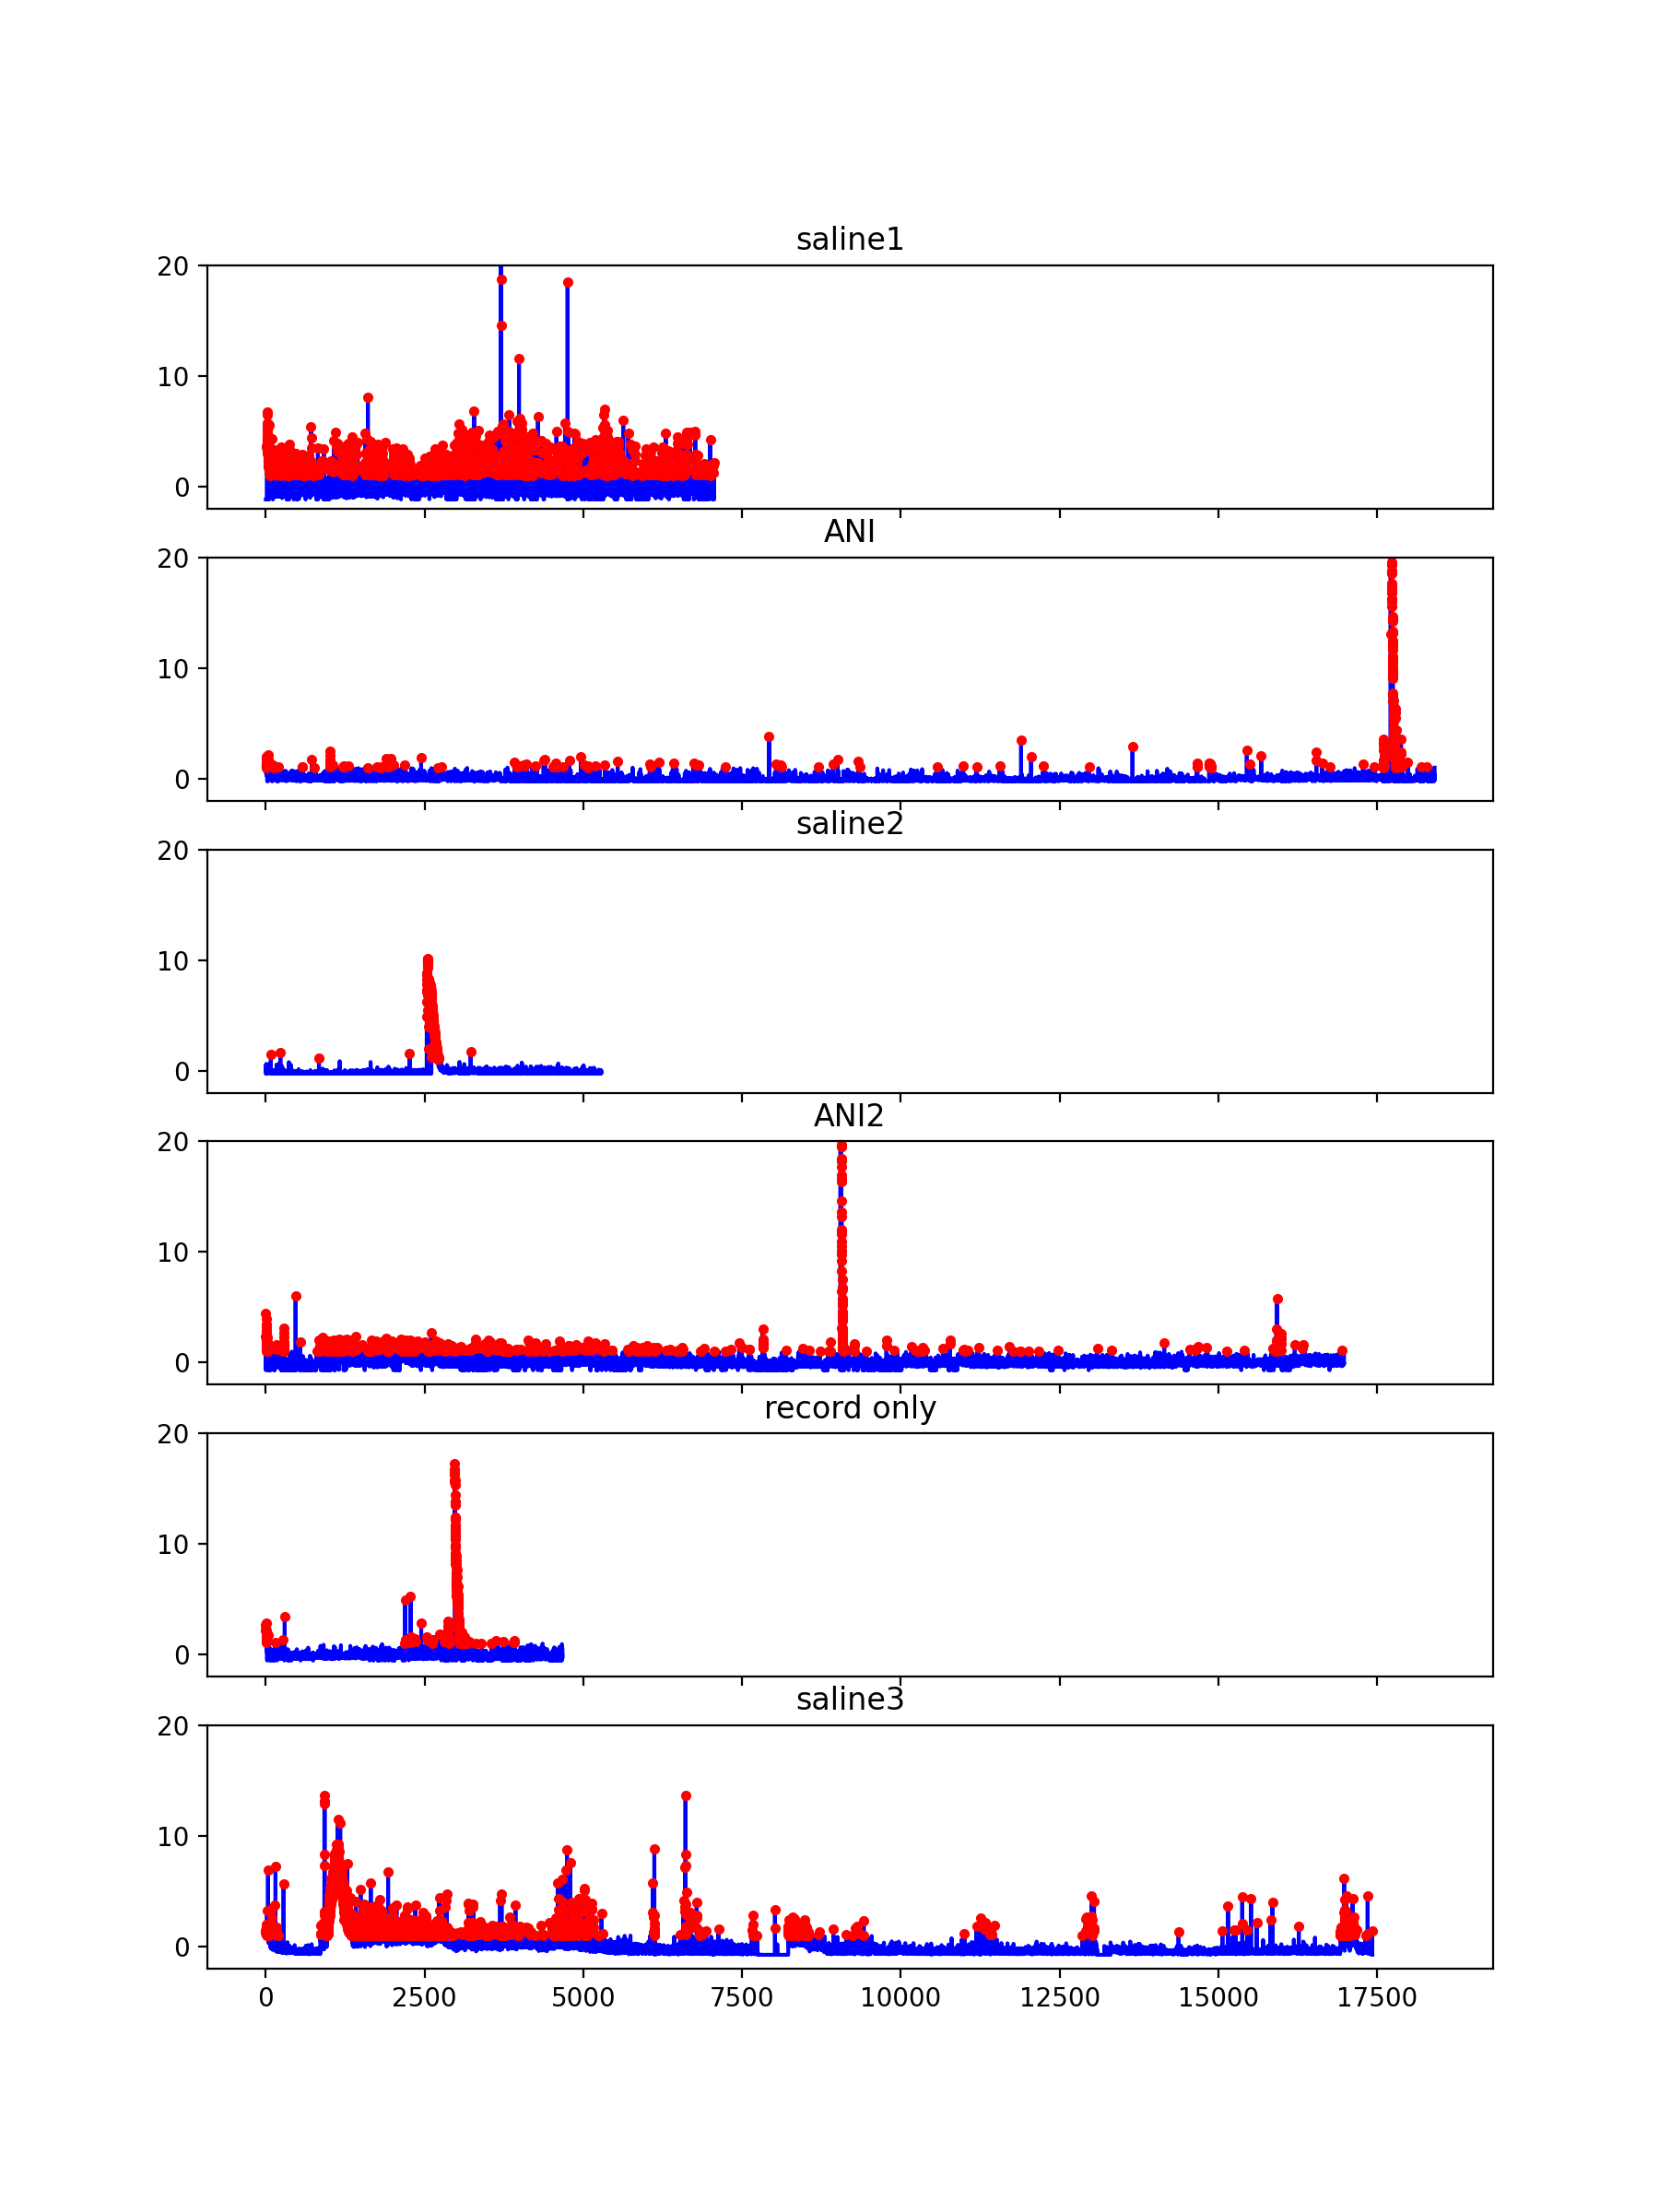

In [59]:
folder_list_full = [saline1_folder, ani_folder, saline2_folder, ani2_folder, rec_only_folder, saline3_folder]
session_full = ['saline1', 'ANI', 'saline2', 'ANI2', 'record only', 'saline3']
unit_type = ['single']*6
burst_thresh = 1
bin_size_sec = 0.5

_, ax = plt.subplots(6, 1, figsize=(9, 12), sharex=True)
bz_all = []
for folder, utype, name, a in zip(folder_list_full, unit_type, session_full, ax):
    
    # Get unit activity
    if utype == 'single':
        sp_times, _ = get_single_units(folder)
    elif utype == 'mua':
        sp_times = get_mua(folder)
    
    # bin it, z score and threshold
    time_bins, binned_rate = bin_spikes2(sp_times, bin_size_sec=bin_size_sec)
    bz = (binned_rate - binned_rate.mean()) / binned_rate.std()
    bz_all.append(bz)
    
    # plot it
    a.plot(time_bins[:-1], bz, 'b-')
    a.plot(time_bins[:-1][bz > burst_thresh], bz[bz > burst_thresh], 'r.')
    a.set_title(name)


[a.set_ylim([-2, 20]) for a in ax.reshape(-1)];

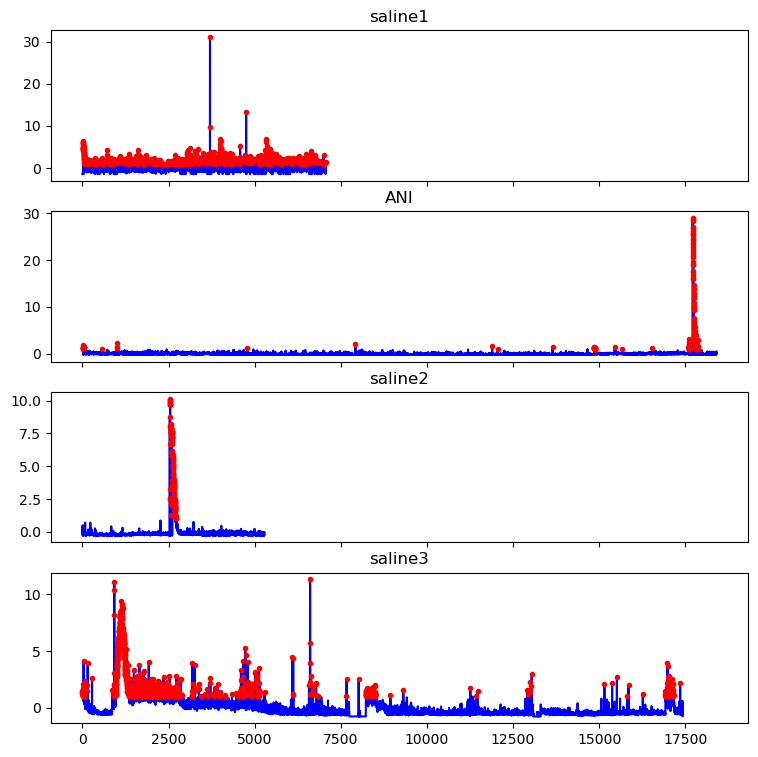

In [30]:
_, ax = plt.subplots(4, 1, figsize=(9, 9), sharex=True)
bz_all = []
for folder, utype, name, a in zip(folder_list_full, unit_type, session, ax):
    
    # Get unit activity
    if utype == 'single':
        sp_times, _ = get_single_units(folder)
    elif utype == 'mua':
        sp_times = get_mua(folder)
    
    # bin it, z score and threshold
    time_bins, binned_rate = bin_spikes2(sp_times, bin_size_sec=bin_size_sec)
    bz = (binned_rate - binned_rate.mean()) / binned_rate.std()
    bz_all.append(bz)
    
    # plot it
    a.plot(time_bins[:-1], bz, 'b-')
    a.plot(time_bins[:-1][bz > burst_thresh], bz[bz > burst_thresh], 'r.')
    a.set_title(name)

In [ ]:
# _, ax = plt.subplots()
# sns.histplot(np.diff(sp_times), ax=ax)

In [ ]:
bin_edges = np.arange(0, 0.5, 0.001)
hist, bin_edges = np.histogram(np.diff(np.sort(sp_times)), bins=bin_edges)

In [ ]:
spt_sal3.shape

In [25]:
# bin_edges = np.arange(0, 0.1, 0.0001)
# _, ax = plt.subplots(4, 1, figsize=(9, 9), sharex=True)
# for folder, utype, name, a in zip(folder_list, unit_type, session, ax):
    
#     # Get unit activity
#     if utype == 'single':
#         sp_times, _ = get_single_units(folder)
#     elif utype == 'mua':
#         sp_times = get_mua(folder)
        
#     a.hist(np.diff(np.sort(sp_times)), bins=bin_edges, density=True)
#     a.set_title(name)
    

In [ ]:
# Now look at mua two ways - all together or split out by electrode separately
spt_sal3 = get_mua(saline3_folder)
spt_sal3_sep = get_mua(saline3_folder, keep_separate=True)

bin_edges = np.arange(0, 0.05, 0.0001)
_, ax = plt.subplots(2, 1, figsize=(8, 4))
ax[0].hist(np.diff(np.sort(spt_sal3)), bins=bin_edges, density=True)

isi_all = []
for st in spt_sal3_sep:
    isi_all.extend(np.diff(np.sort(st)))

isi_all = np.array(isi_all)
ax[1].hist(isi_all, bins=bin_edges, density=True)

In [ ]:
np.sort(np.diff(np.sort(sp_times)))[-6:]

In [35]:
get_single_units(rec_only_folder)

(array([1.50000000e-03, 1.63333333e-03, 2.66666667e-03, ...,
        4.67160470e+03, 4.67160500e+03, 4.67160593e+03]),
 array([  2,  30,  29, ...,  26, 117,   2], dtype=int32))

In [39]:
['single']*6

['single', 'single', 'single', 'single', 'single', 'single']

In [40]:
session

['saline1', 'ANI', 'saline2', 'saline3']

In [45]:
isi_mean

[0.010409632196744753,
 0.011876791107406007,
 0.004689385716525974,
 0.005431461127021603,
 0.00521906329692788,
 0.01343483810895469]

In [46]:
bin_size_sec

1

<IPython.core.display.Javascript object>


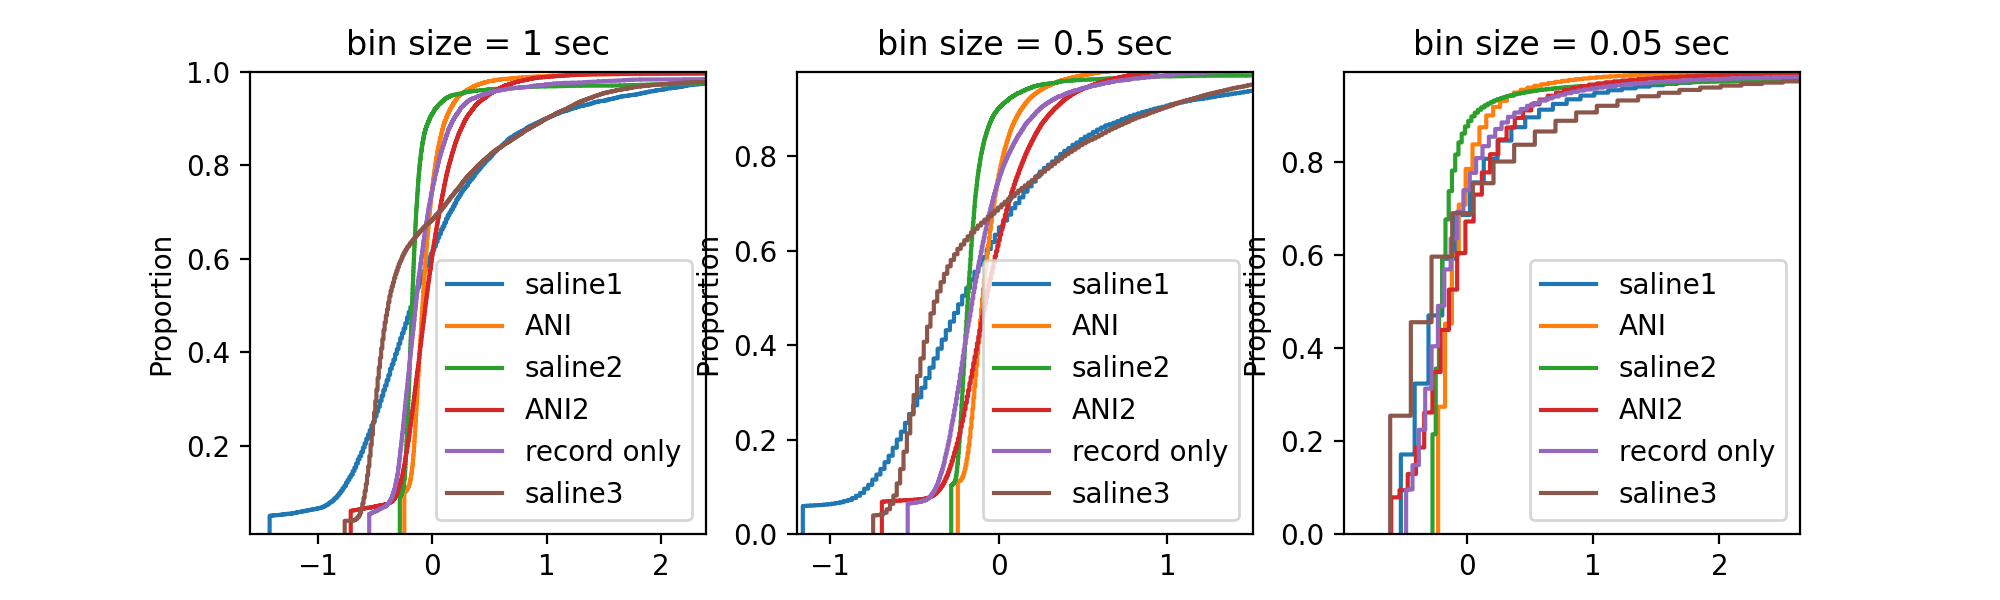

In [51]:
%matplotlib notebook
bin_edges = np.arange(0, 0.05, 0.0001)
_, ax = plt.subplots(1, 3, figsize=(10, 3))

for a, bin_size_sec in zip(ax, [1, 0.5, 0.05]):
    for folder, utype, name in zip(folder_list_full, unit_type, session_full):
        
         # Get unit activity
        if utype == 'single':
            sp_times, _ = get_single_units(folder)
        elif utype == 'mua':
            sp_times = get_mua(folder)

        # bin it, z score and threshold
        time_bins, binned_rate = bin_spikes2(sp_times, bin_size_sec=bin_size_sec)
        bz = (binned_rate - binned_rate.mean()) / binned_rate.std()
        bz_all.append(bz)
        hl = sns.ecdfplot(bz, ax=a)

    lines_handles = [h for h in a.get_children() if isinstance(h, plt.Line2D)]
    a.legend(lines_handles, session_full)
    a.set_title(f'bin size = {bin_size_sec} sec')
                       

<IPython.core.display.Javascript object>


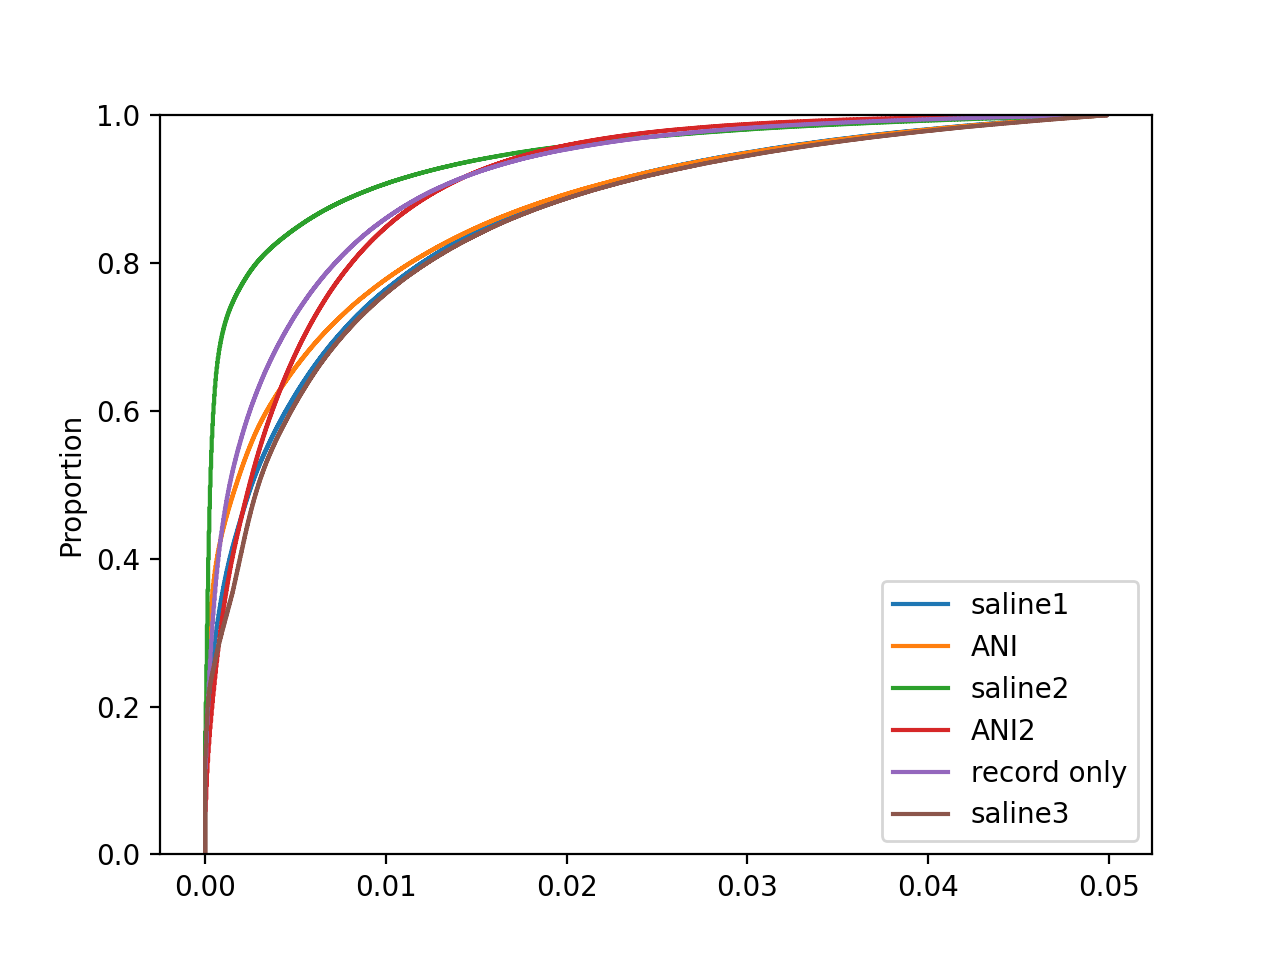

In [44]:
folder_list_full = [saline1_folder, ani_folder, saline2_folder, ani2_folder, rec_only_folder, saline3_folder]
session_full = ['saline1', 'ANI', 'saline2', 'ANI2', 'record only', 'saline3']
unit_type = ['single']*6

%matplotlib notebook
bin_edges = np.arange(0, 0.05, 0.0001)
_, ax = plt.subplots()
isi_mean = []
for folder, utype, name in zip(folder_list_full, unit_type, session_full):
    
    # Get unit activity
    if utype == 'single':
        sp_times, _ = get_single_units(folder)
    elif utype == 'mua':
        sp_times = get_mua(folder)
    mua_sorted = np.sort(sp_times)
    isi = np.diff(mua_sorted)
    isi_mean.append(np.nanmean(isi))
    hl = sns.ecdfplot(isi[isi < np.max(bin_edges)])

lines_handles = [h for h in ax.get_children() if isinstance(h, plt.Line2D)]
ax.legend(lines_handles, session_full)

<IPython.core.display.Javascript object>


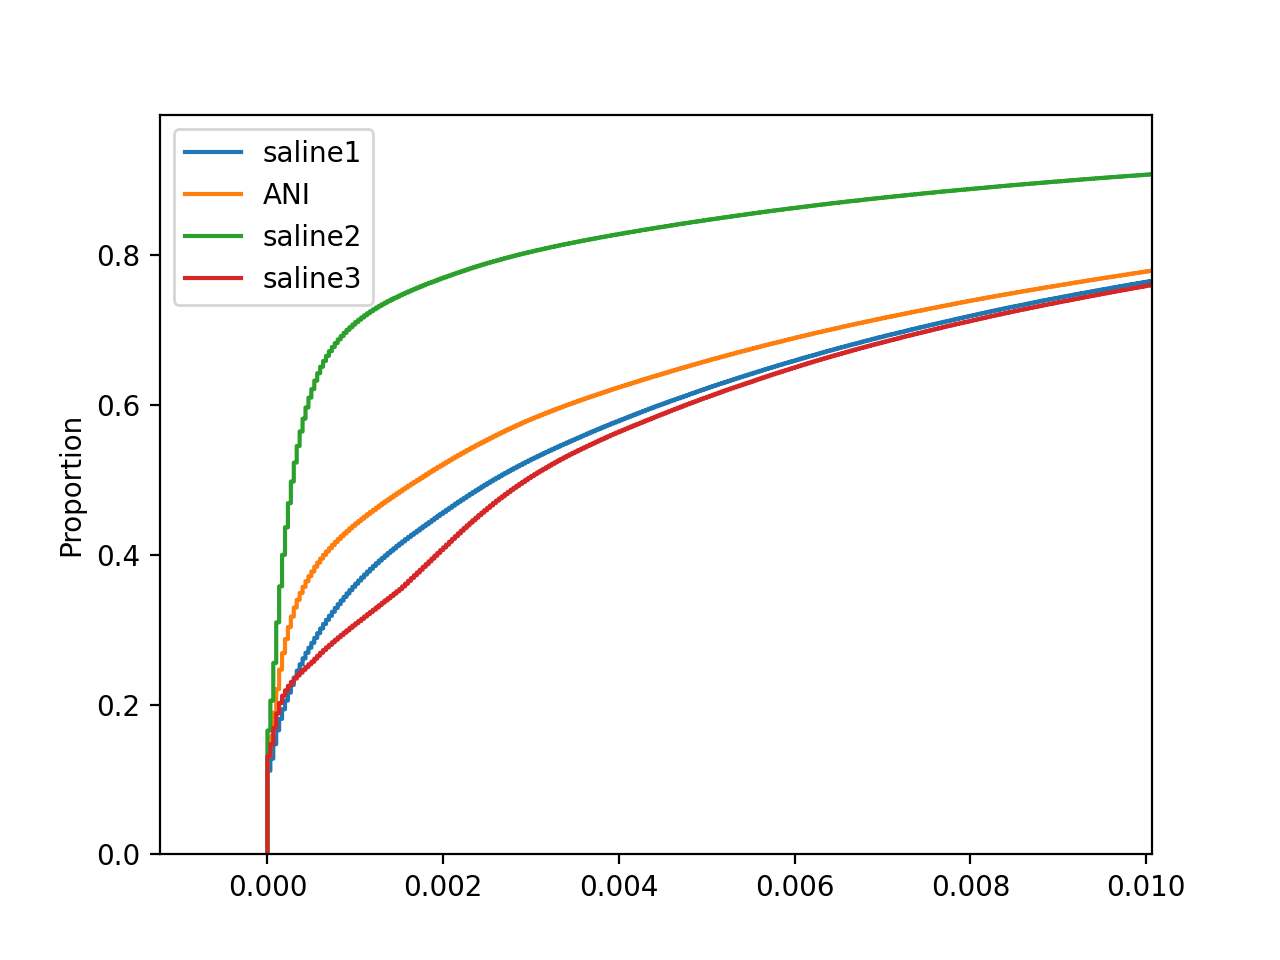

In [34]:
%matplotlib notebook
bin_edges = np.arange(0, 0.05, 0.0001)
_, ax = plt.subplots()
for folder, utype, name in zip(folder_list, unit_type, session):
    
    # Get unit activity
    if utype == 'single':
        sp_times, _ = get_single_units(folder)
    elif utype == 'mua':
        sp_times = get_mua(folder)
    mua_sorted = np.sort(sp_times)
    isi = np.diff(mua_sorted)
    hl = sns.ecdfplot(isi[isi < np.max(bin_edges)])

lines_handles = [h for h in ax.get_children() if isinstance(h, plt.Line2D)]
ax.legend(lines_handles, session)

In [ ]:
_, ax = plt.subplots()
# ax.plot(bin_edges[:-1], hist)
ax.hist(np.diff(np.sort(sp_times)), bins=bin_edges, density=True)

In [ ]:
bz_all

In [ ]:
_, ax = plt.subplots()
hl_all = []
for bz in bz_all:
    hl = sns.ecdfplot(bz, ax=ax)
    hl_all.append(hl)

lines_handles = [h for h in ax.get_children() if isinstance(h, plt.Line2D)]
ax.legend(lines_handles, session)

In [33]:
# Rough plot of MUA bursts
# btimes, brate = bin_spikes2(sp_times, bin_size_sec=0.05)
# _, ax = plt.subplots(figsize=(8,3))
# ax.plot(btimes[:-1], brate)
# ax.axhline(brate.mean(), color='g')